## Importing the dataset

In [1173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
#import sys
#!{sys.executable} -m pip install --upgrade seaborn

In [1174]:
data=pd.read_csv('D:\\competetions\housing prices dataset\\train.csv')

In [1175]:
testing=pd.read_csv('D:\\competetions\housing prices dataset\\test2.csv')
testing.shape

(1459, 80)

the purpose of this side project is to get to understand:
    1. Different visualization techniques.
    2. Understand Advanced regression techniques(Gradient Boosting Machine).
    3. Feature engineering.
    4. Imputing missing values.

In [1176]:
print(data.shape)
print(data.head())
for i in data.columns:
    print(data[i].describe())
    print('***************************')

(1460, 81)
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   94         190  C (all)         60.0     7200   Pave   NaN      Reg   
1  654          50       RM         60.0    10320   Pave  Grvl      Reg   
2  849          50       RL         75.0    45600   Pave   NaN      IR2   
3  247         190       RM         69.0     9142   Pave  Grvl      Reg   
4  741          70       RM         60.0     9600   Pave  Grvl      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN  MnPrv         NaN       0   
2         Bnk    AllPub    ...            0    NaN    NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN  GdPrv         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
***************************
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
***************************
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
***************************
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
***************************
count     1460
unique       4
top         TA
freq       735
Name: KitchenQual, dtype

In [1177]:
x1=data.shape[0]
data.shape

(1460, 81)

## Working with missing values
Trying to find out the null or missing values in the dataset.

In [1178]:
def count_missing(df):
    for i in df.columns:
        x=df[i].isnull().sum()
        if x>0:
            print("{} has {} null values".format(i,x))

In [1179]:
count_missing(data)

LotFrontage has 259 null values
Alley has 1369 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values
PoolQC has 1453 null values
Fence has 1179 null values
MiscFeature has 1406 null values


In [1180]:
count_missing(testing)

MSZoning has 4 null values
LotFrontage has 227 null values
Alley has 1352 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
PoolQC has 1456 null values
Fence has 1169 null values
MiscFeature has 1408 null values
SaleType has 1 null values


From the results of the missing values we can see that there are some fields which are of less importance or no importance to our analysis. The field are nearly full of missing values cant describe much of our data. Therefore we are going to drop these fields.

In [1181]:
data=data.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [1182]:
testing=testing.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)
testing.shape

(1459, 76)

In [1183]:
count_missing(data)

LotFrontage has 259 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 37 null values
BsmtCond has 37 null values
BsmtExposure has 38 null values
BsmtFinType1 has 37 null values
BsmtFinType2 has 38 null values
Electrical has 1 null values
FireplaceQu has 690 null values
GarageType has 81 null values
GarageYrBlt has 81 null values
GarageFinish has 81 null values
GarageQual has 81 null values
GarageCond has 81 null values


In [1184]:
count_missing(testing)

MSZoning has 4 null values
LotFrontage has 227 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
SaleType has 1 null values


GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond  have the same number of missing values. The question that rings in our brain is: 
    1. Are these 81 data points the same? 
    2. If they are the same, what percentage of the dataset do they take?
    3. Is the percentage negligible to drop the datapoints?

In [1185]:
100*81/(data.shape[0])

5.5479452054794525

Since the number of datapoints missing values is 5 percent, then it wont bite much if you dropped the missing values

In [1186]:
data=data.dropna(subset=['GarageType'])

In [1187]:
#testing=testing.dropna(subset=['GarageType'])

In [1188]:
count_missing(data)

LotFrontage has 252 null values
MasVnrType has 8 null values
MasVnrArea has 8 null values
BsmtQual has 30 null values
BsmtCond has 30 null values
BsmtExposure has 31 null values
BsmtFinType1 has 30 null values
BsmtFinType2 has 31 null values
Electrical has 1 null values
FireplaceQu has 618 null values


In [1189]:
count_missing(testing)

MSZoning has 4 null values
LotFrontage has 227 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
SaleType has 1 null values


Above we dropped null values for only GarageType but the result is interesting because the rest of the fields which had the same number of missing values also dropped them. This means that the missing values  for these fields were the same data points.

In [1190]:
data=data.dropna(subset=['BsmtFinType1','MasVnrType','BsmtFinType2','Electrical','BsmtExposure'])

In [1191]:
count_missing(data)

LotFrontage has 244 null values
FireplaceQu has 591 null values


In [1192]:
count_missing(testing)

MSZoning has 4 null values
LotFrontage has 227 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 730 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
SaleType has 1 null values


In [1193]:
x2=data.shape[0]
data.shape

(1338, 77)

In [1194]:
testing.shape

(1459, 76)

The percentage loss of data points after removing the null values so far is:

In [1195]:
100*(x1-x2)/x2

9.118086696562033

This shows that from our dataset we have removed nine percent of the datapoints because of the missing values. We now have two more columns having missing values. To correct this we have to look at the distributions of the datapoints in these columns.

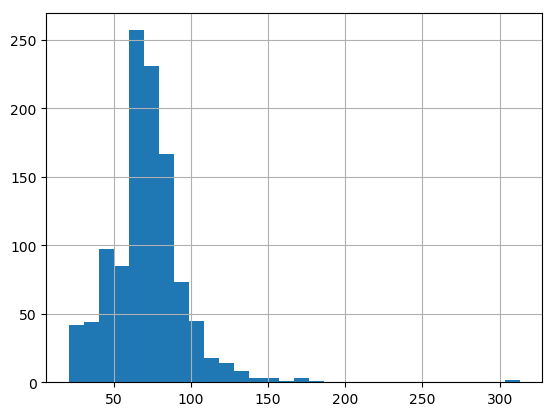

In [1196]:
data['LotFrontage'].hist(bins=30)

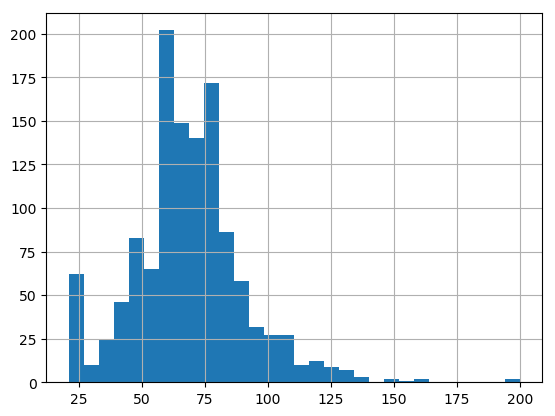

In [1197]:
testing['LotFrontage'].hist(bins=30)

The above distribution looks like a Gaussian distribution but skewed to the right. We are going to find a value which if we impute in the missing values will not affect the distribution of our field. Looking at the avarage value. Is falls around the mode. Therefore we are going to impute the missing values using the mean.

In [1198]:
m=data['LotFrontage'].mean()
m

70.75959780621572

In [1199]:
data['LotFrontage'][data['LotFrontage'].isnull()]=m

In [1200]:
testing['LotFrontage'][testing['LotFrontage'].isnull()]=m

C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Since FireplaceQu is a categorical variable and has many missing values, its better if we makethese missing values another category. In this case we are going to make the missing values fall in the category called missing.

In [1201]:
data['FireplaceQu'][data['FireplaceQu'].isnull()]="missing"

In [1202]:
testing['FireplaceQu'][testing['FireplaceQu'].isnull()]="missing"

C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1203]:
data['FireplaceQu'].unique()

array(['Gd', 'missing', 'TA', 'Ex', 'Fa', 'Po'], dtype=object)

In [1204]:
count_missing(data)

In [1205]:
count_missing(testing)

MSZoning has 4 null values
Utilities has 2 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 16 null values
MasVnrArea has 15 null values
BsmtQual has 44 null values
BsmtCond has 45 null values
BsmtExposure has 44 null values
BsmtFinType1 has 42 null values
BsmtFinSF1 has 1 null values
BsmtFinType2 has 42 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
KitchenQual has 1 null values
Functional has 2 null values
GarageType has 76 null values
GarageYrBlt has 78 null values
GarageFinish has 78 null values
GarageCars has 1 null values
GarageArea has 1 null values
GarageQual has 78 null values
GarageCond has 78 null values
SaleType has 1 null values


In [1206]:
testing.shape

(1459, 76)

In [1207]:
for i in testing.columns:
    testing[i][testing[i].isnull()]=testing[i][0]

C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


All the missing values are dealt with. The next step is to work with the data type of the dataset

## Seperating the dataset basing of the datatype of the features

My habbit while doing analysis of a new dataset is to sepeate the dataset basing on the datatypes of the features. I mostly seperate the dataset into three categories:
    1. Date and time features.
    2. Categorical features.
    3. Numerical features.

In [1208]:
integer_encoded_columns=data[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
                         'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                         'GarageCars']]
integer_encoded_columns.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
0,6,6,0,1,2,0,4,2,9,1,2
1,6,7,0,0,1,0,3,1,7,0,1
2,6,8,0,0,3,0,5,1,10,1,2
3,6,8,0,0,2,0,4,2,9,0,1
4,5,7,0,0,2,0,2,1,7,0,2


In [1209]:
integer_encoded_columns2=testing[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
                         'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                         'GarageCars']]
integer_encoded_columns2.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
0,5,6,0.0,0.0,1,0,2,1,5,0,1.0
1,6,6,0.0,0.0,1,1,3,1,6,0,1.0
2,5,5,0.0,0.0,2,1,3,1,6,1,2.0
3,6,6,0.0,0.0,2,1,3,1,7,1,2.0
4,8,5,0.0,0.0,2,0,2,1,5,0,2.0


for the integer encoded data above. We are going to convert the data type from float to object so that the data can be categorical once more.

In [1210]:
integer_encoded_columns_objects=integer_encoded_columns.astype(str)
integer_encoded_columns_objects.describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,9,8,3,3,4,3,7,3,10,4,4
top,6,5,0,0,2,0,3,1,6,1,2
freq,359,770,764,1258,720,808,764,1299,379,631,793


In [1211]:
integer_encoded_columns_objects2=integer_encoded_columns2.astype(str)
integer_encoded_columns_objects2.describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,10,9,4,3,5,3,7,3,12,5,6
top,5,5,0.0,0.0,2,0,3,1,6,0,2.0
freq,428,824,851,1366,762,921,792,1393,442,730,770


Now that the integer encoded columns have been converted to categorical variables. We are going to join themwith the rest of the categorical data.

In [1212]:
categorical_data=data.select_dtypes(include=['object']).join(integer_encoded_columns_objects)
categorical_data.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,...,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,5,2,4,4,2,5,3,25,9,8,...,8,3,3,4,3,7,3,10,4,4
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,5,0,0,2,0,3,1,6,1,2
freq,1066,1333,829,1206,1337,957,1265,209,1162,1324,...,770,764,1258,720,808,764,1299,379,631,793


In [1213]:
categorical_data2=testing.select_dtypes(include=['object']).join(integer_encoded_columns_objects2)
categorical_data2.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,2,4,4,1,5,3,25,9,5,...,9,4,3,5,3,7,3,12,5,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,5,0.0,0.0,2,0,3,1,6,0,2.0
freq,1114,1453,934,1311,1459,1081,1396,218,1251,1444,...,824,851,1366,762,921,792,1393,442,730,770


In [1214]:
categorical_data.shape

(1338, 50)

Working with the time data. Our dataset is having features describing the years an event happens. The purpose is to convert the years into categorical variables and see how this will help us do predictions.

In [1215]:
time_data=data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
time_data.describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1973.029148,1985.668909,1978.596413,2007.805680
std,29.563540,20.296463,24.773741,1.330691
min,1880.000000,1950.000000,1900.000000,2006.000000
25%,1956.000000,1968.000000,1962.000000,2007.000000
50%,1976.000000,1994.500000,1980.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [1216]:
time_data2=testing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
time_data2.describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000
mean,1971.357779,1983.662783,1976.827279,2007.769705
std,30.390071,21.130467,25.988291,1.301740
min,1879.000000,1950.000000,1895.000000,2006.000000
25%,1953.000000,1963.000000,1960.500000,2007.000000
50%,1973.000000,1992.000000,1977.000000,2008.000000
75%,2001.000000,2004.000000,2001.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,2010.000000


The result above shows that the mininum time is 1872 and the maximum time is 2010. We are going to create new features for our dataset basing on these time fields. We are going to categorise the data basing on ten year buckets of the three events.

In [1217]:
time_data['catYearBuilt']= pd.cut(time_data['YearBuilt'],[i for i in range(1870,2020,10)], labels=False)
labels = np.array(["{}_to_{}".format(i,i+10) for i in range(1870,2010,10)])
time_data['catYearBuilt'] = labels[time_data['catYearBuilt']]
time_data['catYearRemodAdd']= pd.cut(time_data['YearRemodAdd'],[i for i in range(1870,2020,10)], labels=False)
labels = np.array(["{}_to_{}".format(i,i+10) for i in range(1870,2010,10)])
time_data['catYearRemodAdd'] = labels[time_data['catYearRemodAdd']]
time_data['catYrSold']= pd.cut(time_data['YrSold'],[i for i in range(1870,2020,10)], labels=False)
labels = np.array(["{}_to_{}".format(i,i+10) for i in range(1870,2010,10)])
time_data['catYrSold'] = labels[time_data['catYrSold']]
time_data['catGarageYrBlt']= pd.cut(time_data['GarageYrBlt'],[i for i in range(1870,2020,10)],
                                    labels=False)
time_data=time_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
time_data=time_data.astype(str)
time_data.describe()

C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,catYearBuilt,catYearRemodAdd,catYrSold,catGarageYrBlt
count,1338,1338,1338,1338
unique,14,7,1,12
top,2000_to_2010,2000_to_2010,2000_to_2010,13
freq,350,466,1338,363


In [1218]:
time_data2['catYearBuilt']= pd.cut(time_data2['YearBuilt'],[i for i in range(1870,2020,10)], labels=False)
labels = np.array(["{}_to_{}".format(i,i+10) for i in range(1870,2010,10)])
time_data2['catYearBuilt'] = labels[time_data2['catYearBuilt']]
time_data2['catYearRemodAdd']= pd.cut(time_data2['YearRemodAdd'],[i for i in range(1870,2020,10)], labels=False)
labels = np.array(["{}_to_{}".format(i,i+10) for i in range(1870,2010,10)])
time_data2['catYearRemodAdd'] = labels[time_data2['catYearRemodAdd']]
time_data2['catYrSold']= pd.cut(time_data2['YrSold'],[i for i in range(1870,2020,10)], labels=False)
labels = np.array(["{}_to_{}".format(i,i+10) for i in range(1870,2010,10)])
time_data2['catYrSold'] = labels[time_data2['catYrSold']]
time_data2['catGarageYrBlt']= pd.cut(time_data2['GarageYrBlt'],[i for i in range(1870,2020,10)],
                                    labels=False)
time_data2=time_data2.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)
time_data2=time_data2.astype(str)
time_data2.describe()

C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,catYearBuilt,catYearRemodAdd,catYrSold,catGarageYrBlt
count,1459,1459,1459,1459
unique,14,7,1,13
top,2000_to_2010,2000_to_2010,2000_to_2010,13.0
freq,371,479,1459,377


Now our we have created new categorical features from our time data. We are therefore going to join it with the categorical data. 

In [1219]:
categorical_data=categorical_data.join(time_data)
#categorical_data.drop([],axis=1)
categorical_data.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,catYearBuilt,catYearRemodAdd,catYrSold,catGarageYrBlt
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,...,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,5,2,4,4,2,5,3,25,9,8,...,3,7,3,10,4,4,14,7,1,12
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,0,3,1,6,1,2,2000_to_2010,2000_to_2010,2000_to_2010,13
freq,1066,1333,829,1206,1337,957,1265,209,1162,1324,...,808,764,1299,379,631,793,350,466,1338,363


In [1220]:
categorical_data2=categorical_data2.join(time_data2)
#categorical_data2.drop([],axis=1)
categorical_data2.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,catYearBuilt,catYearRemodAdd,catYrSold,catGarageYrBlt
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,5,2,4,4,1,5,3,25,9,5,...,3,7,3,12,5,6,14,7,1,13
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,0,3,1,6,0,2.0,2000_to_2010,2000_to_2010,2000_to_2010,13.0
freq,1114,1453,934,1311,1459,1081,1396,218,1251,1444,...,921,792,1393,442,730,770,371,479,1459,377


### VISUALIZATION OF THE CATEGORICAL DATA

In [1221]:
def bar_plotting(df):
    for i in df.columns:
        sns.countplot(y=i, data=df)
        plt.show()

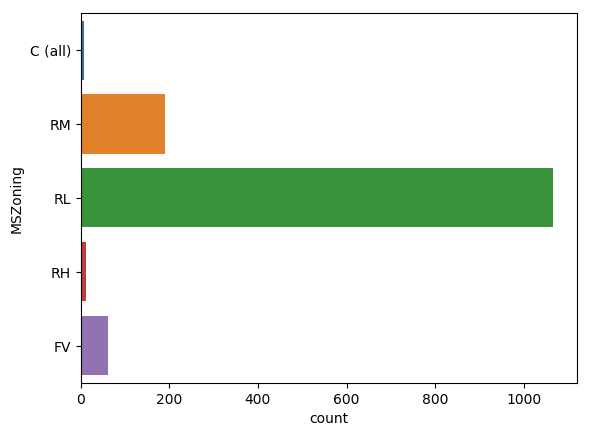

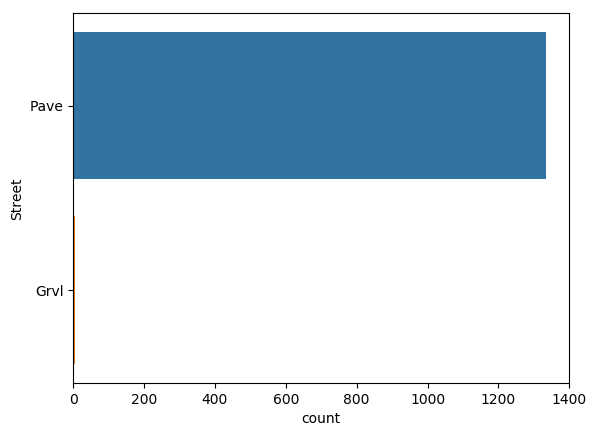

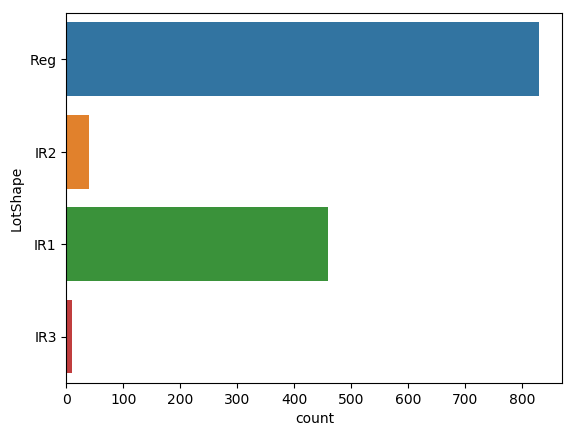

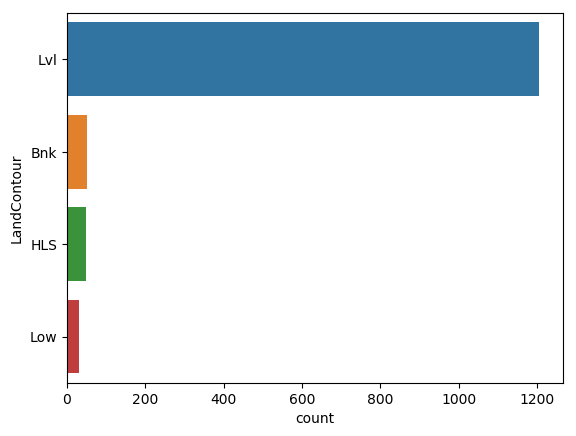

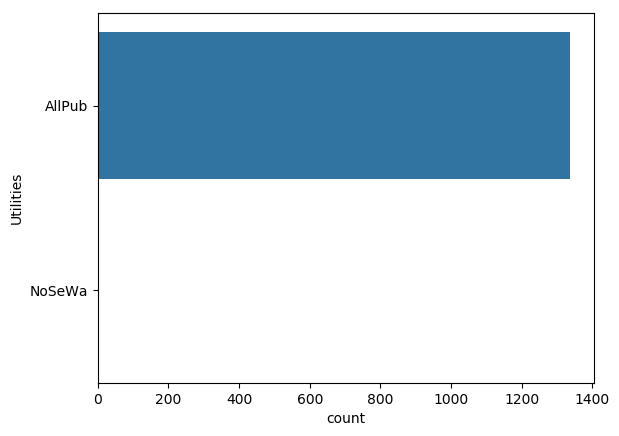

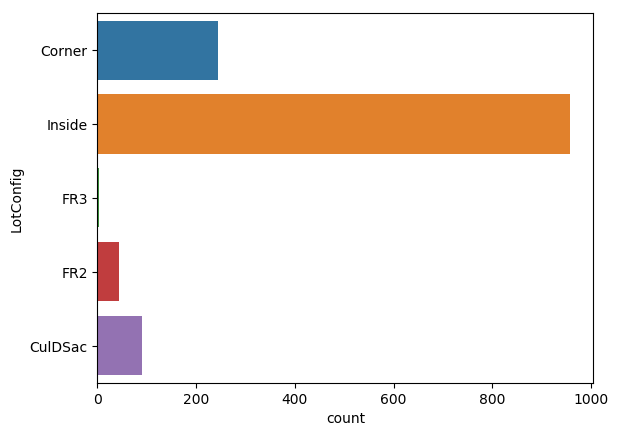

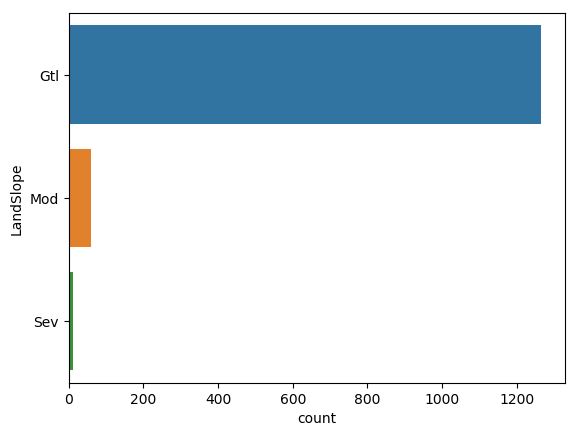

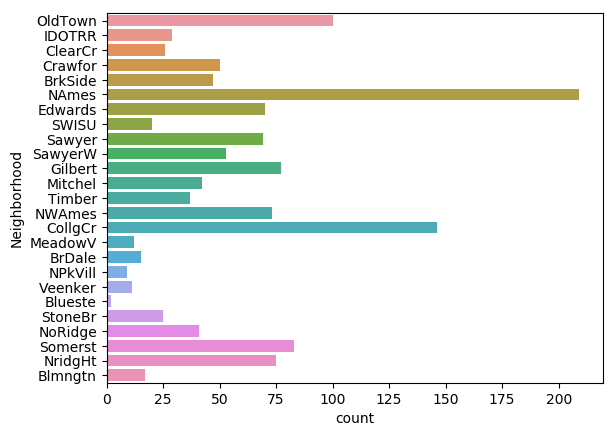

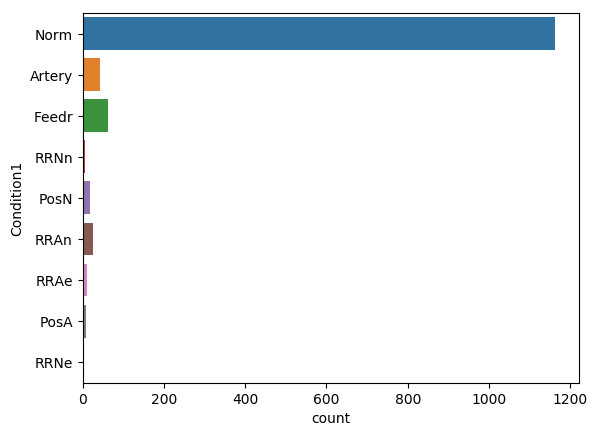

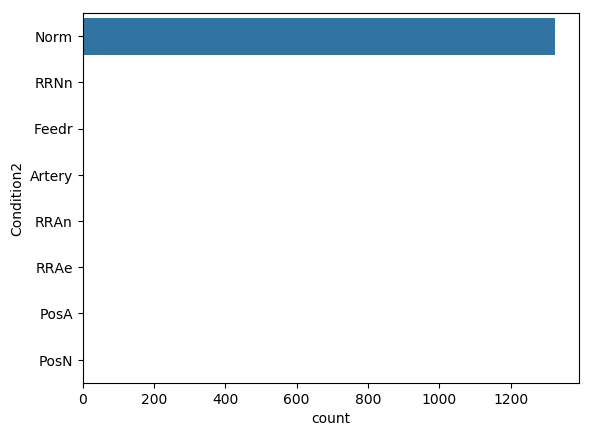

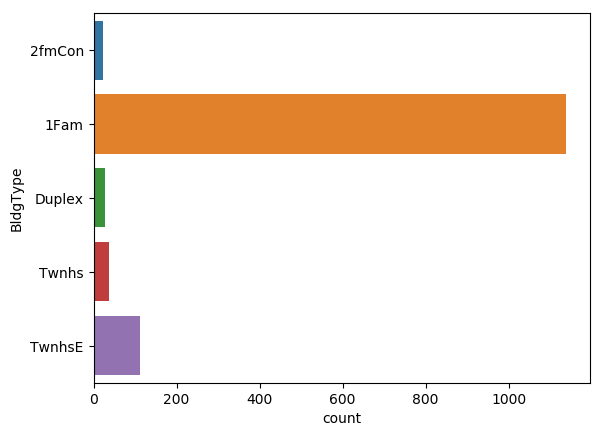

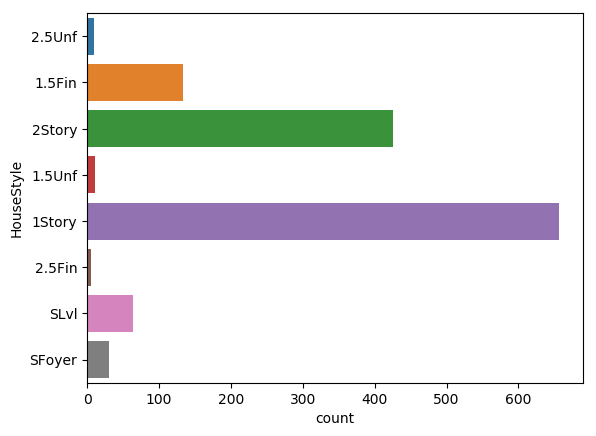

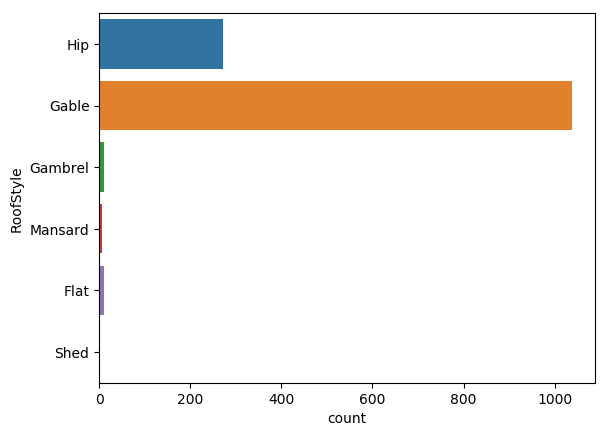

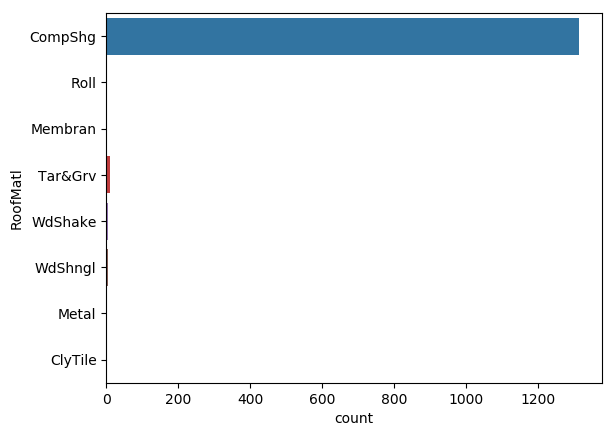

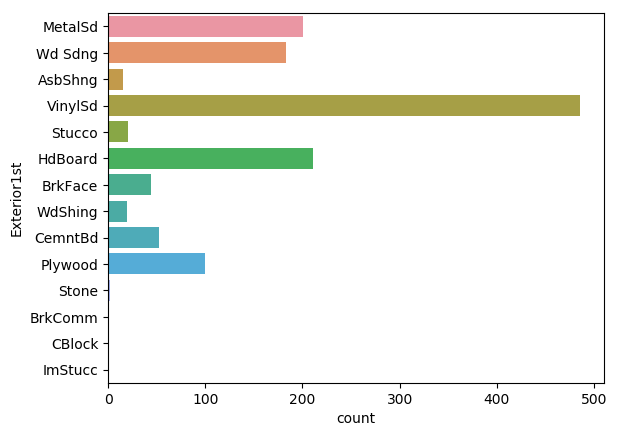

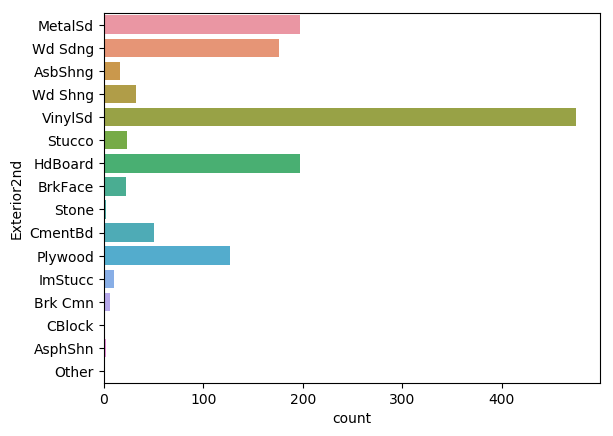

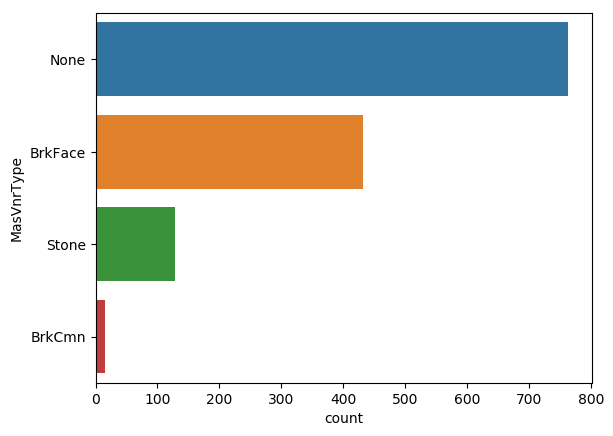

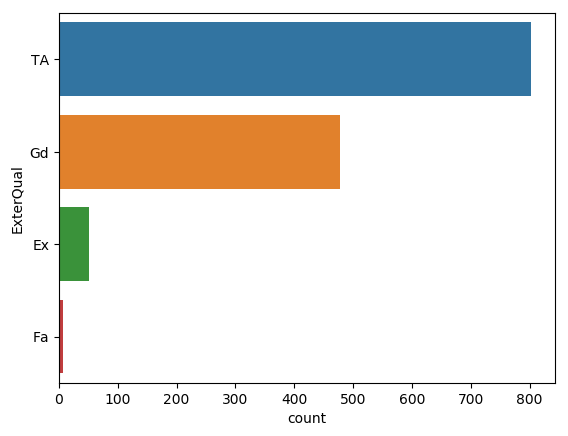

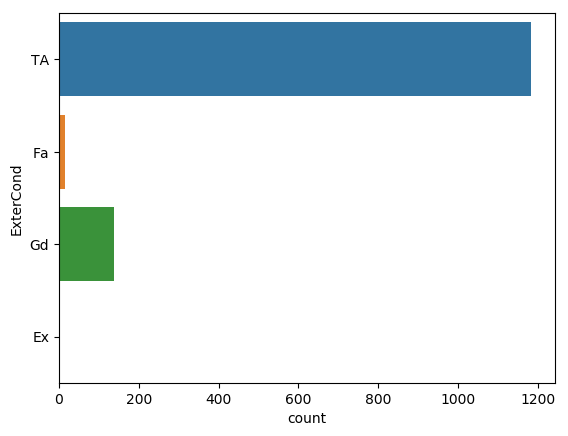

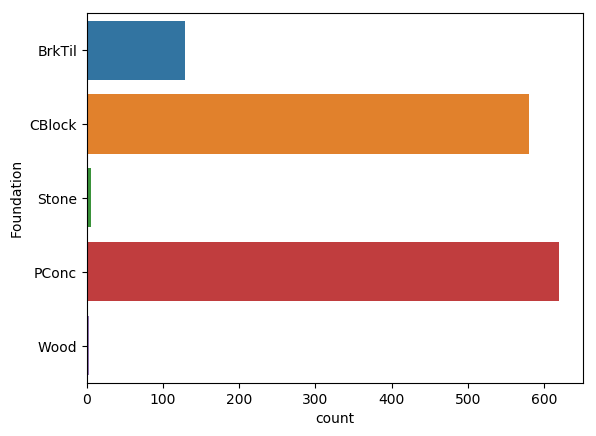

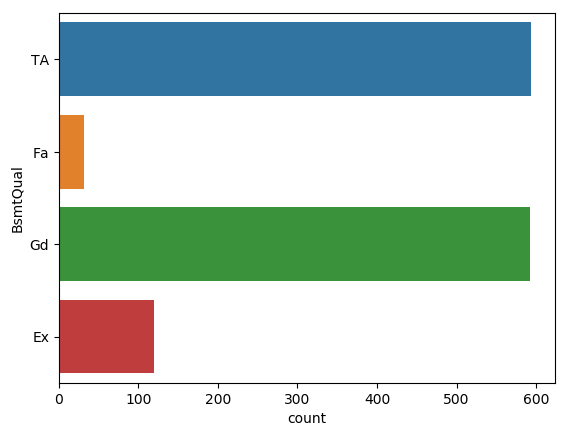

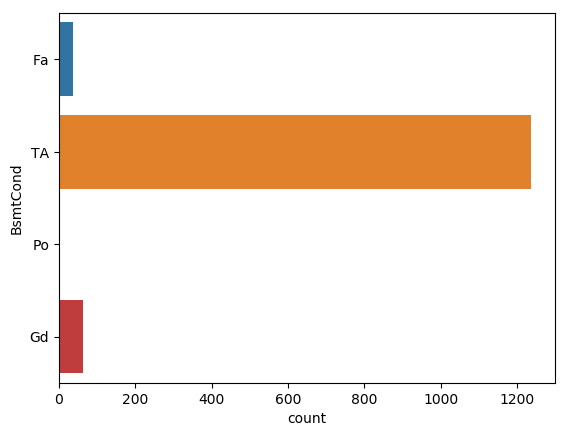

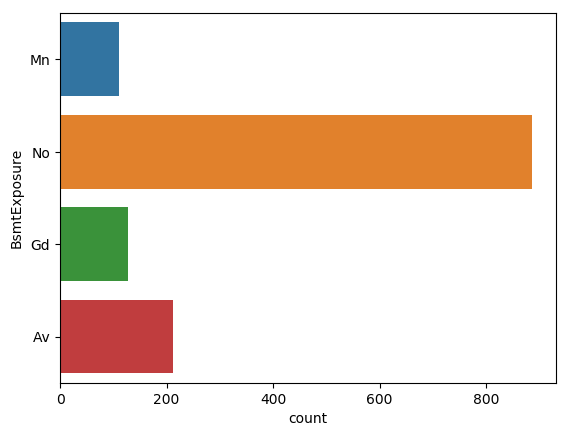

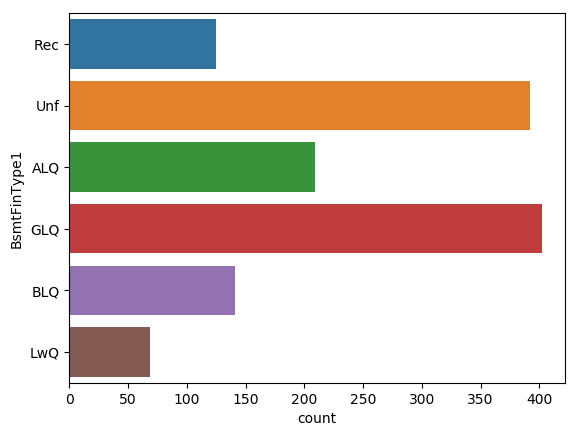

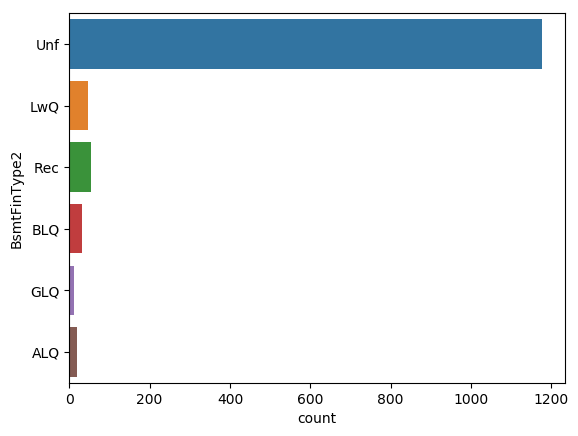

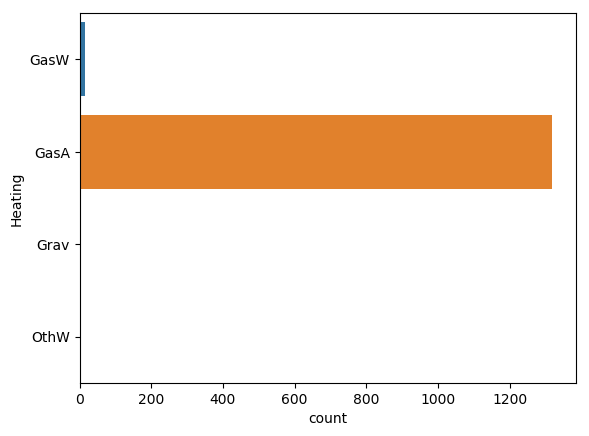

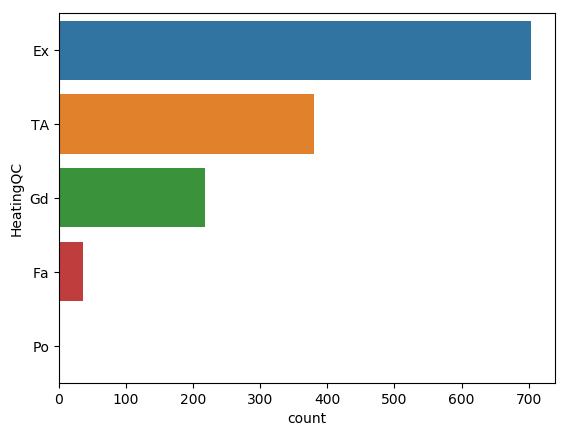

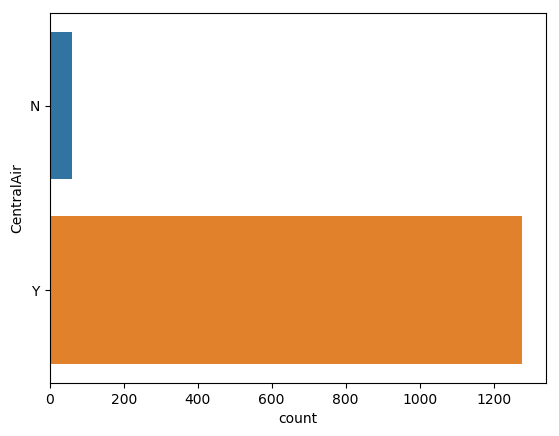

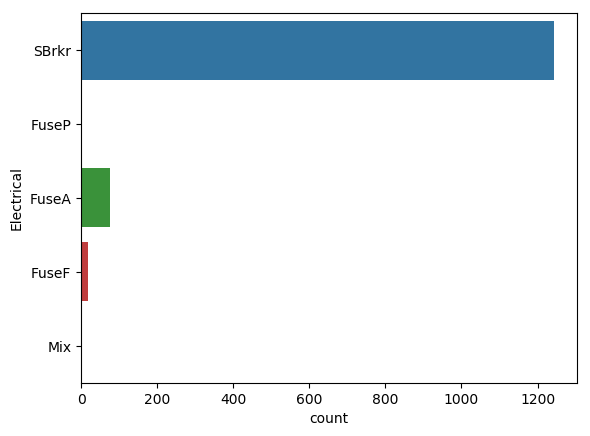

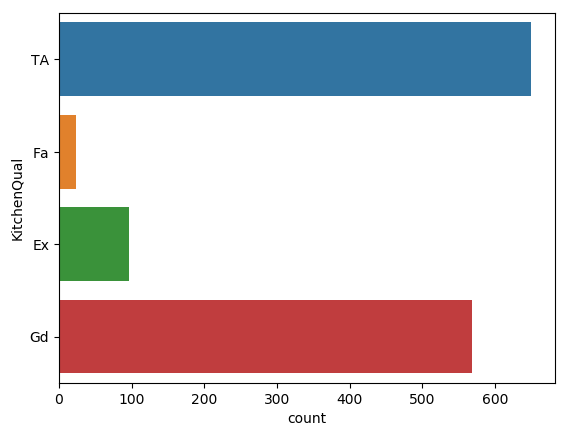

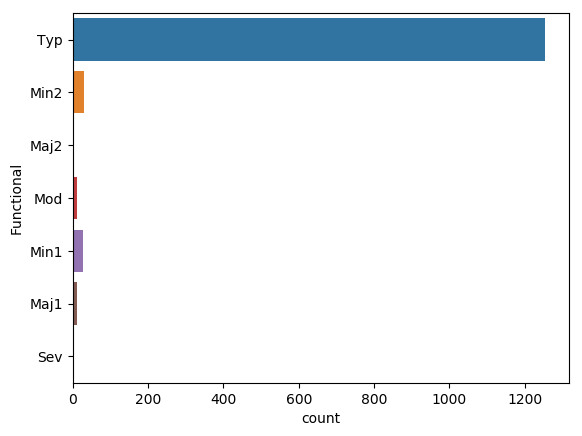

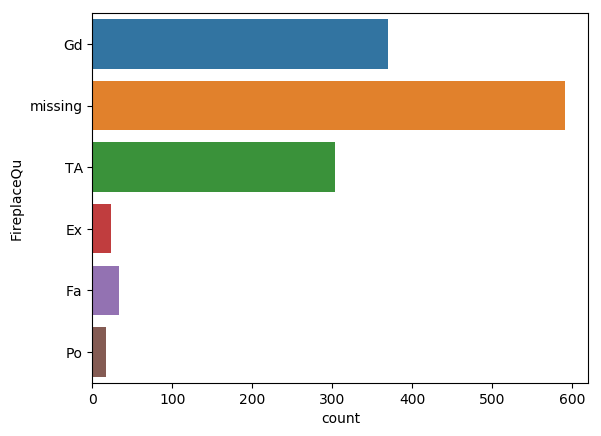

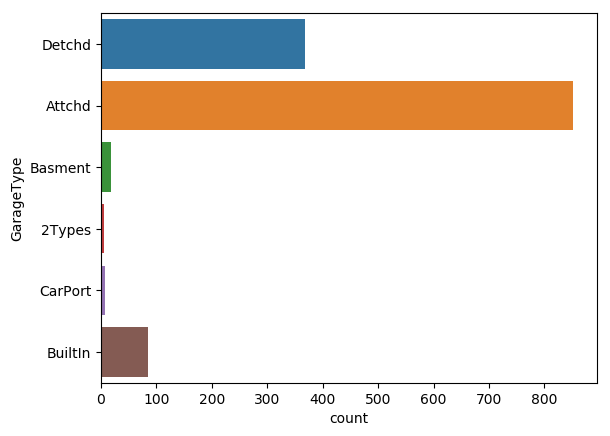

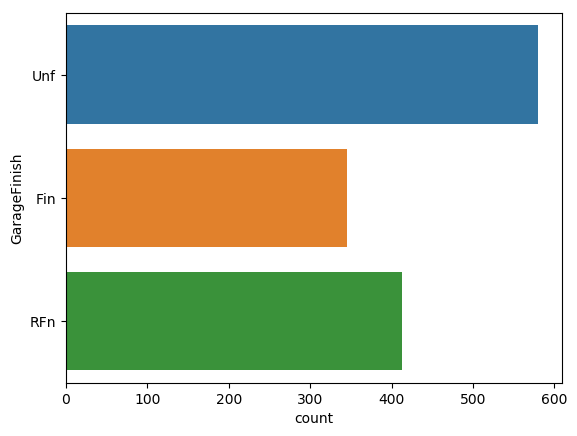

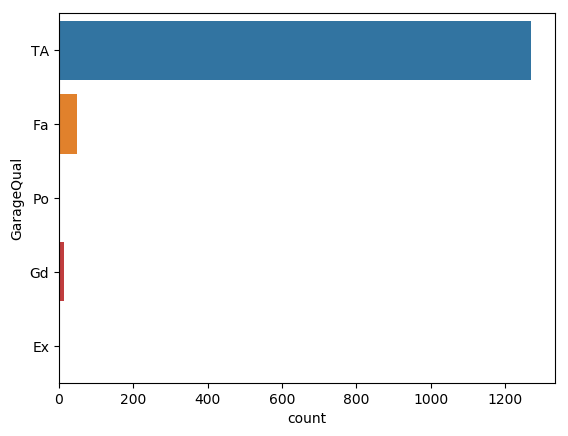

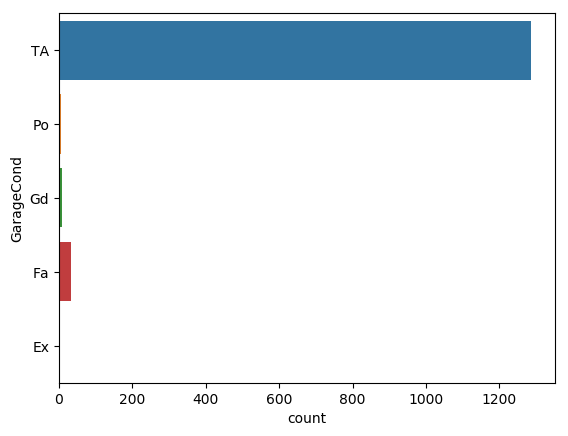

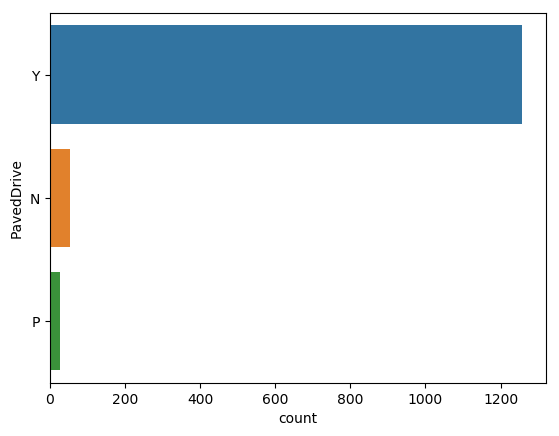

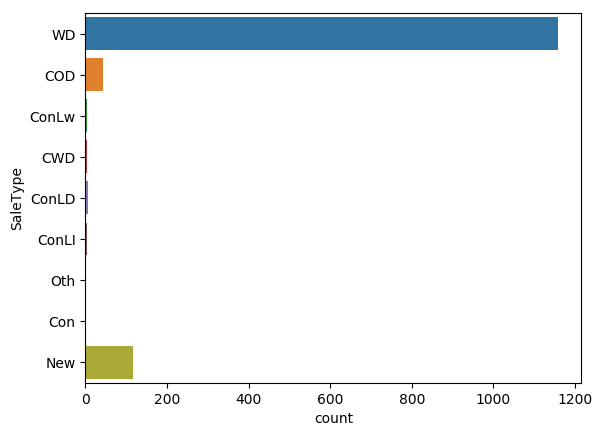

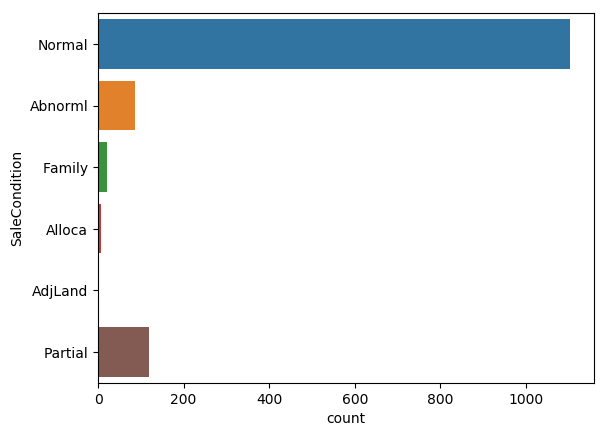

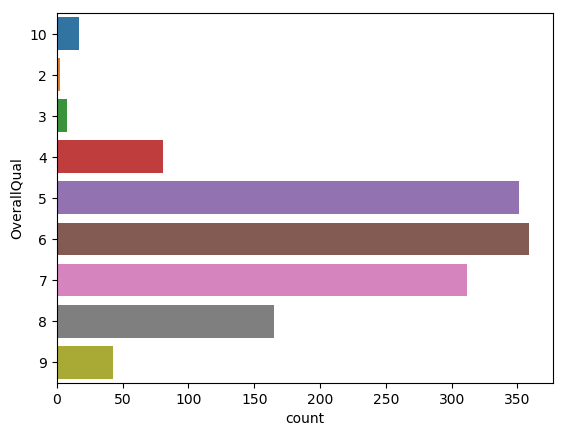

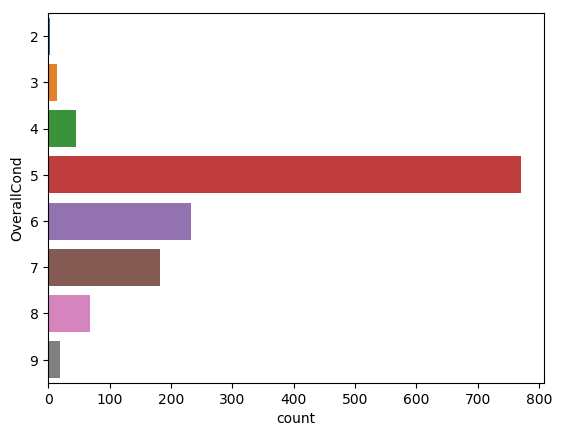

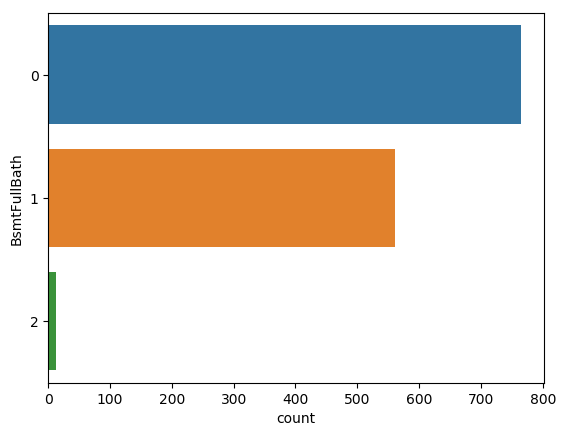

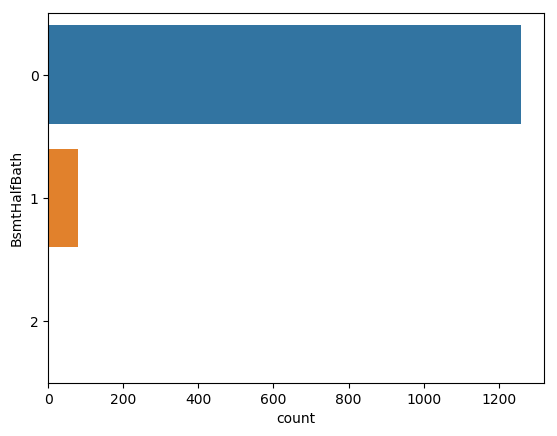

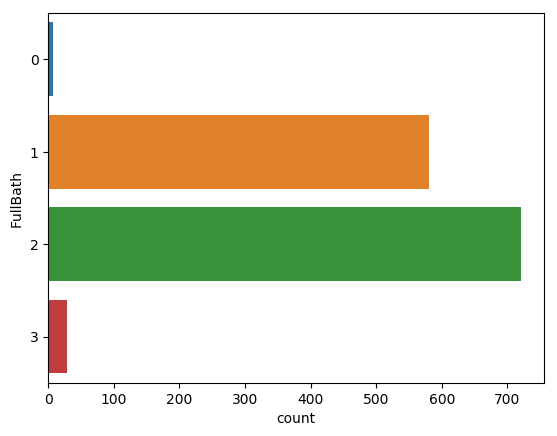

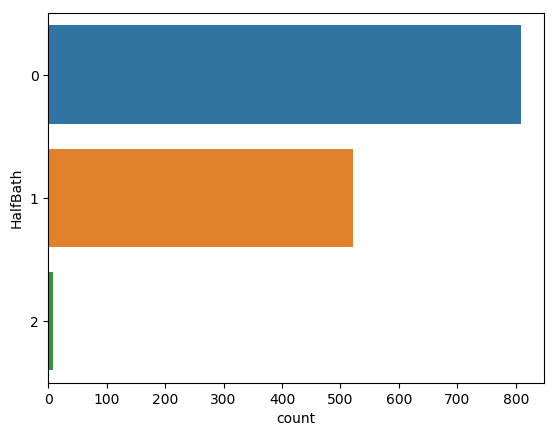

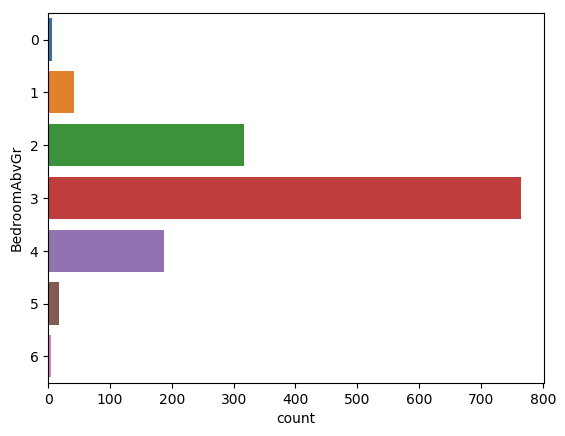

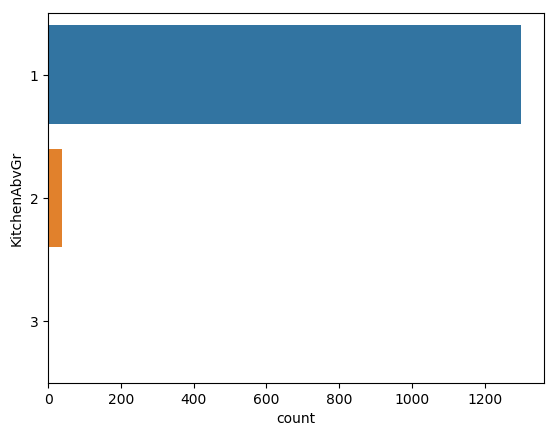

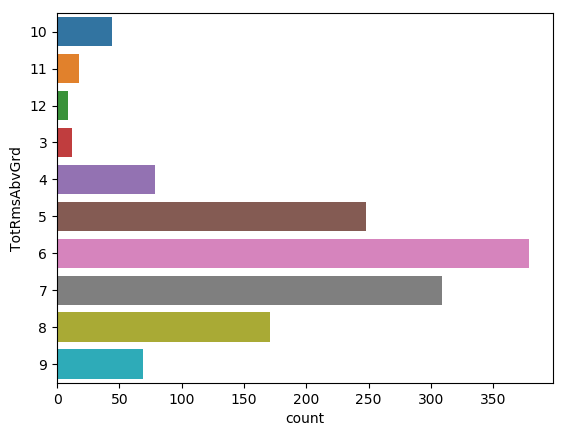

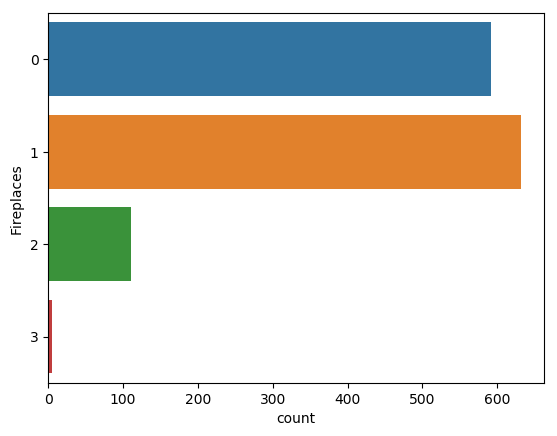

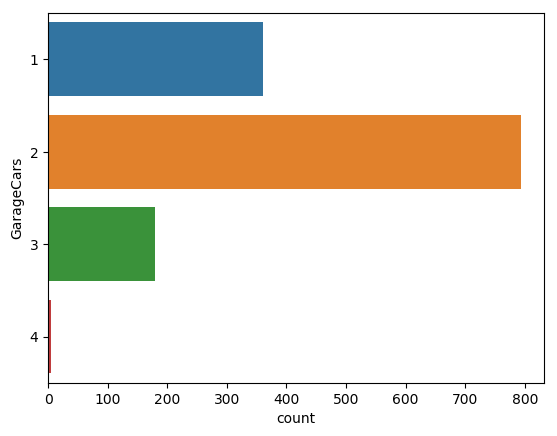

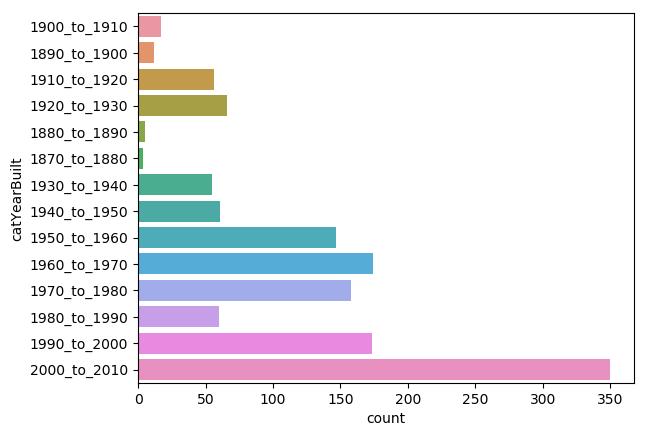

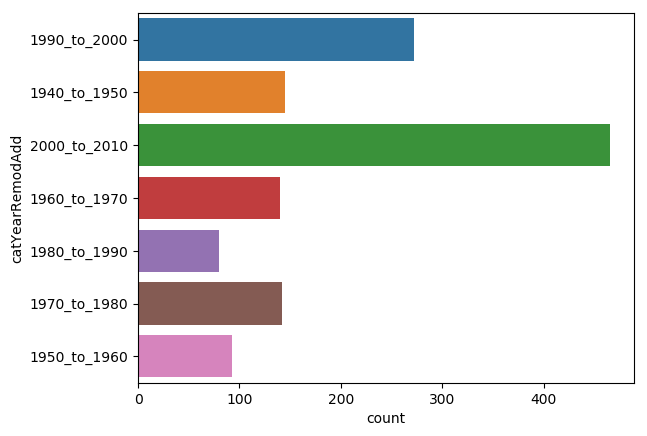

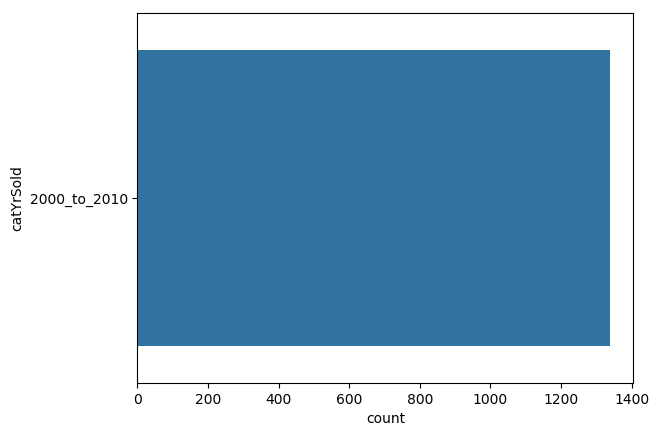

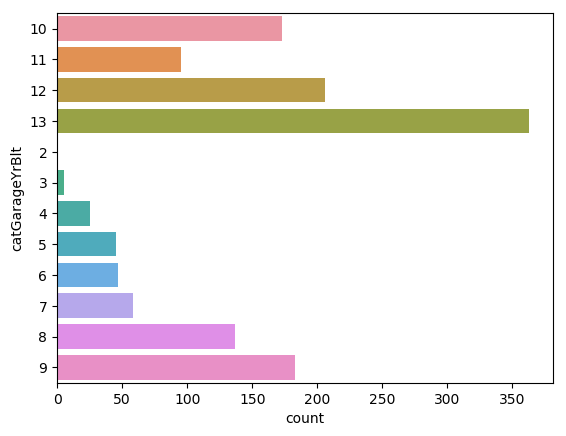

In [1222]:
bar_plotting(categorical_data)

From the visualizations above we findout some fields which will not be necessary for our models because they are so much not balanced. Some variables take the whole frequency while other variables take no or negligible frequency. Just like the way we dropped fields which had null values almost surely we will drop these fields.

In [1223]:
categorical_data=categorical_data.drop(['Street','LandContour','Utilities','LandSlope',
                                       'Condition1','Condition2','BldgType','RoofMatl','BsmtCond',
                                       'BsmtFinType2','Heating','CentralAir','Electrical','Functional',
                                       'GarageQual','GarageCond','PavedDrive','SaleType','KitchenAbvGr',
                                       'catYrSold'],axis=1)

In [1224]:
categorical_data2=categorical_data2.drop(['Street','LandContour','Utilities','LandSlope',
                                       'Condition1','Condition2','BldgType','RoofMatl','BsmtCond',
                                       'BsmtFinType2','Heating','CentralAir','Electrical','Functional',
                                       'GarageQual','GarageCond','PavedDrive','SaleType','KitchenAbvGr',
                                       'catYrSold'],axis=1)

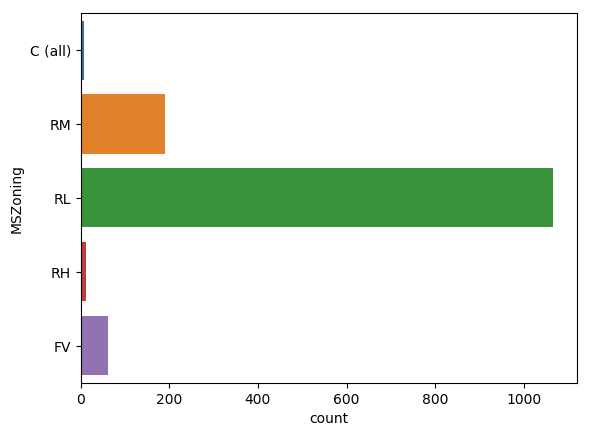

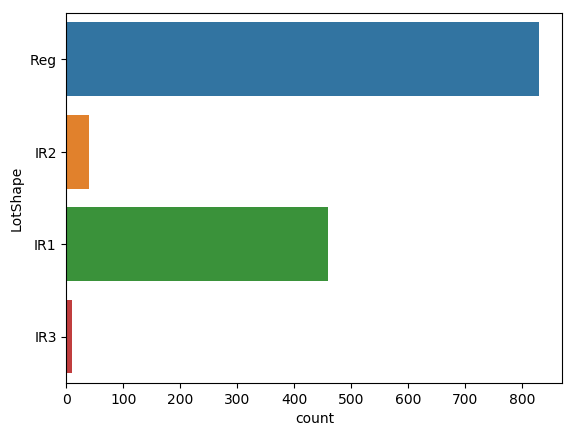

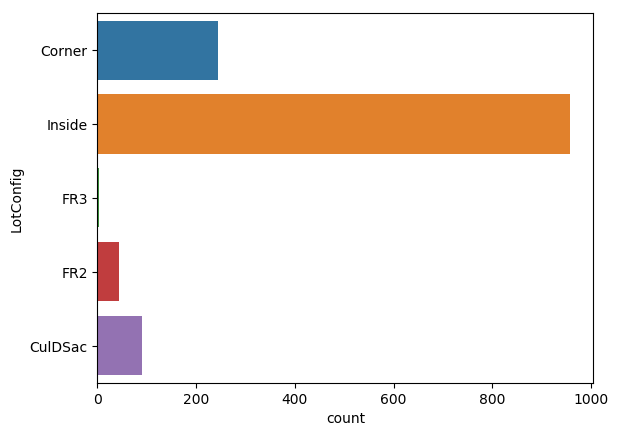

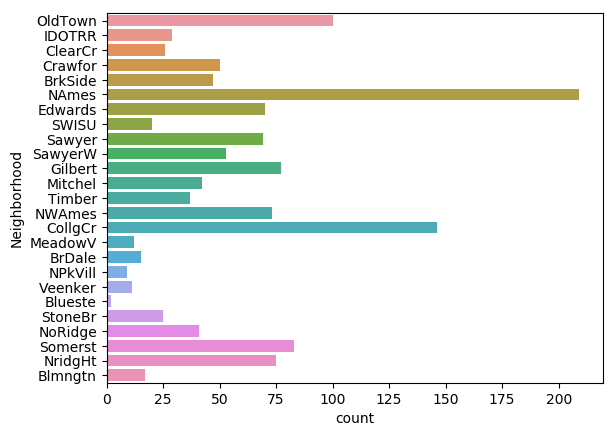

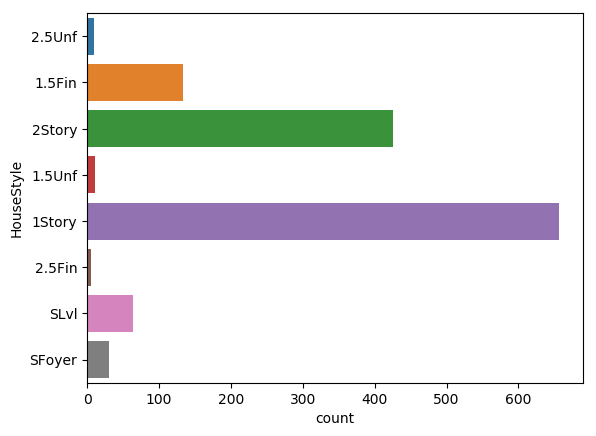

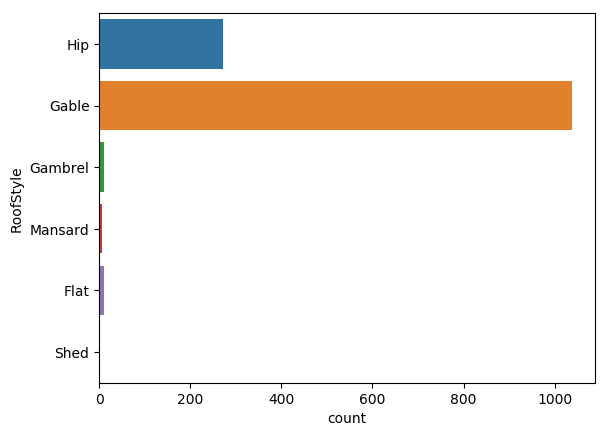

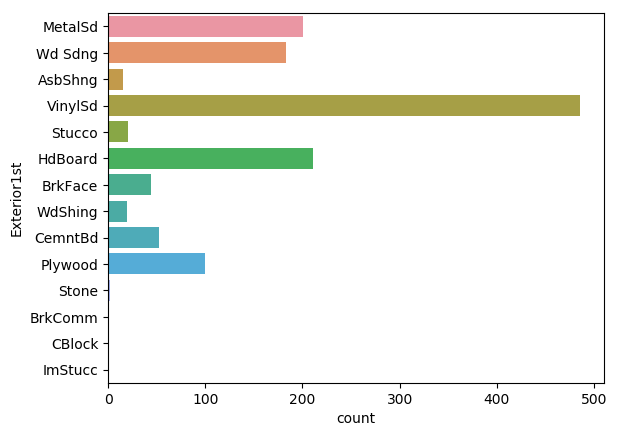

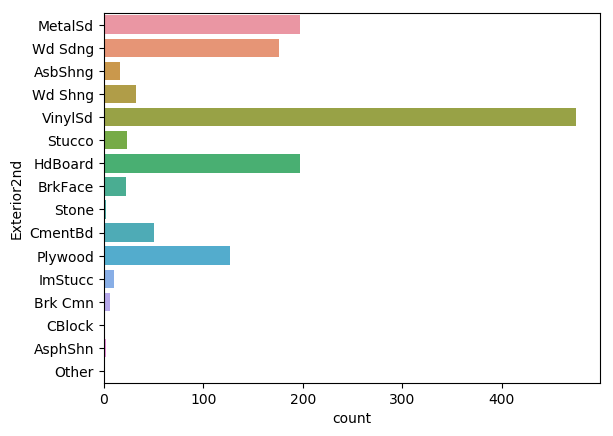

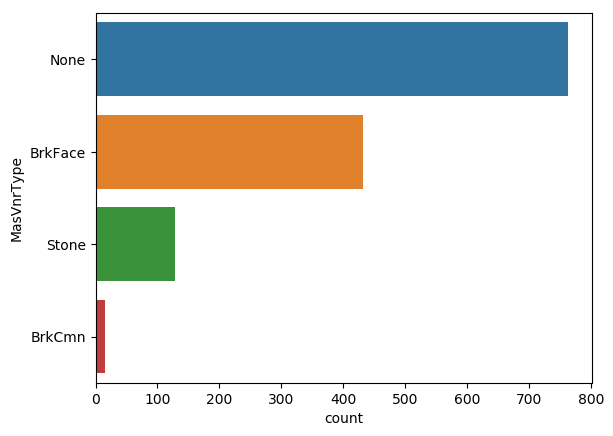

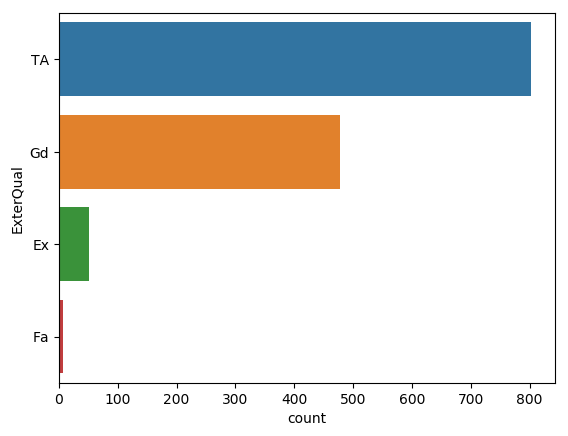

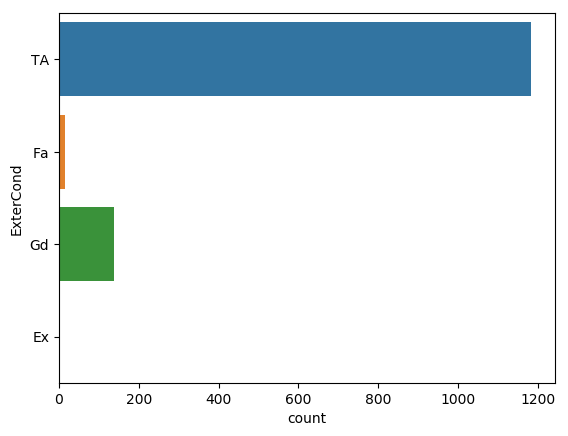

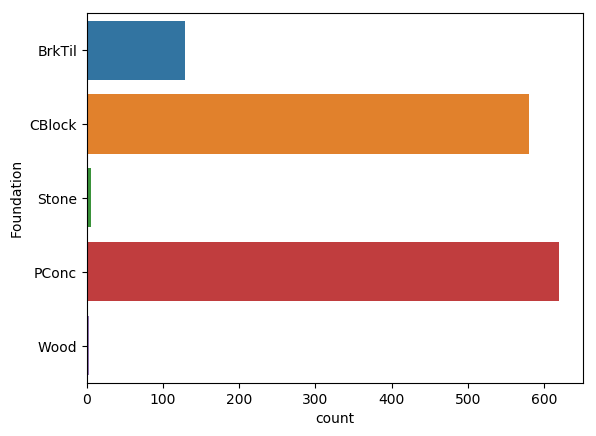

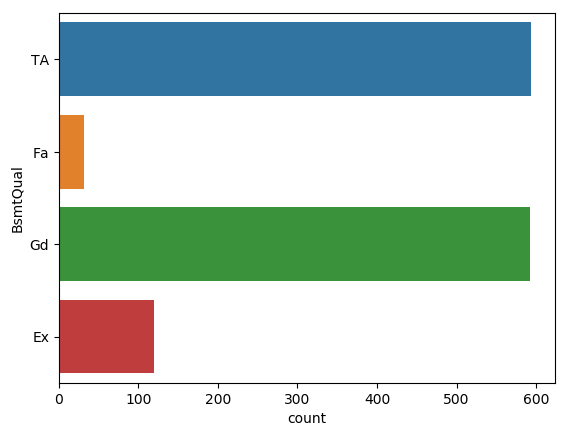

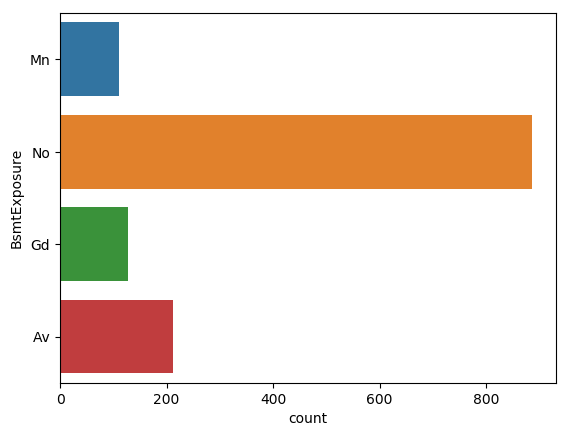

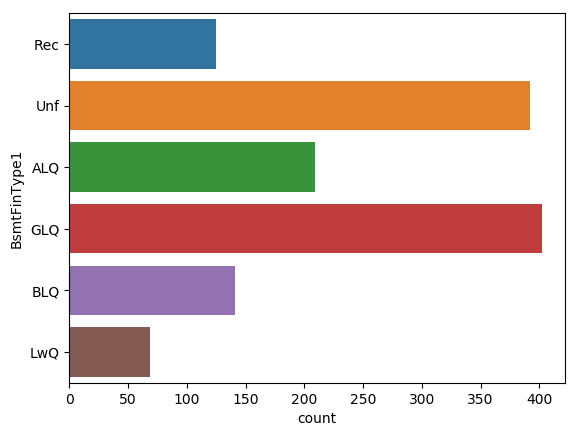

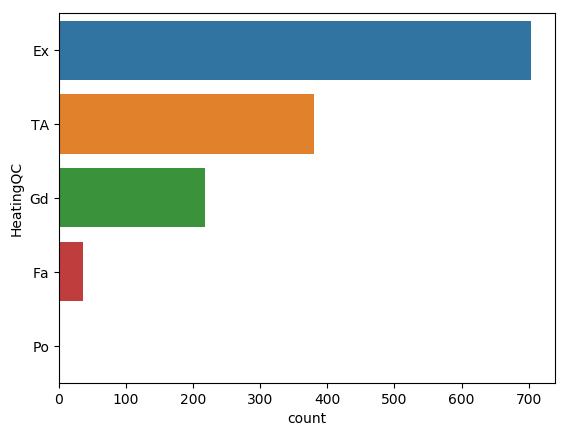

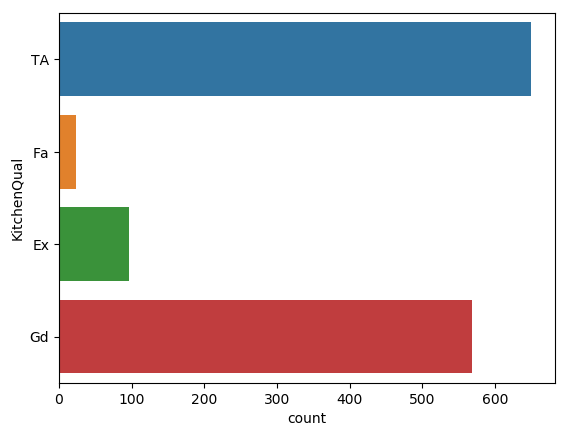

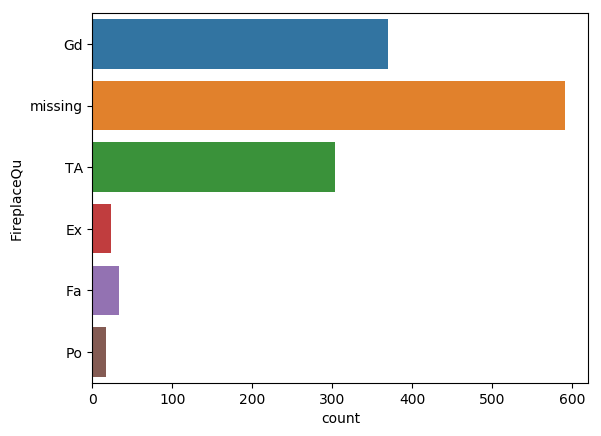

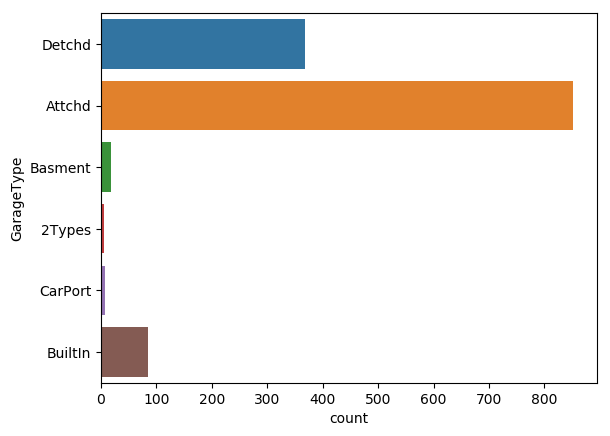

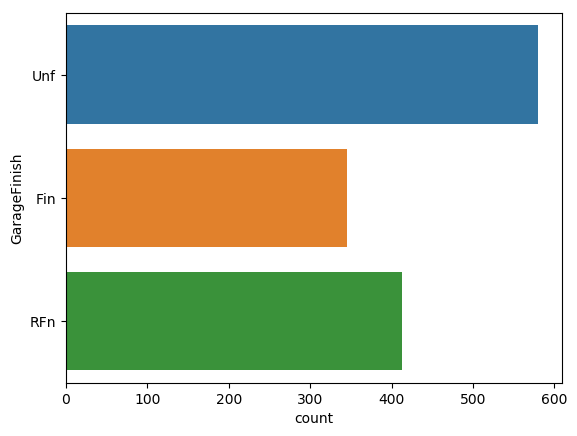

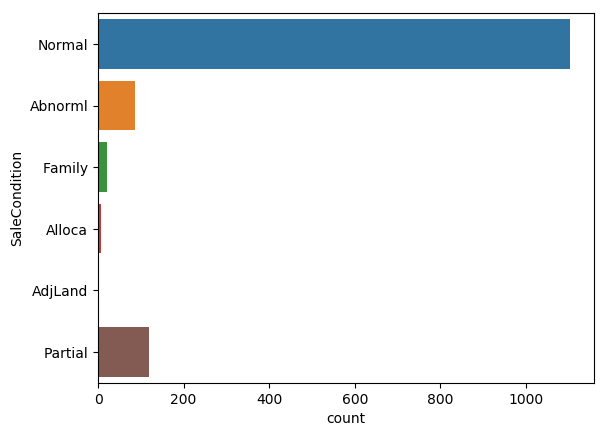

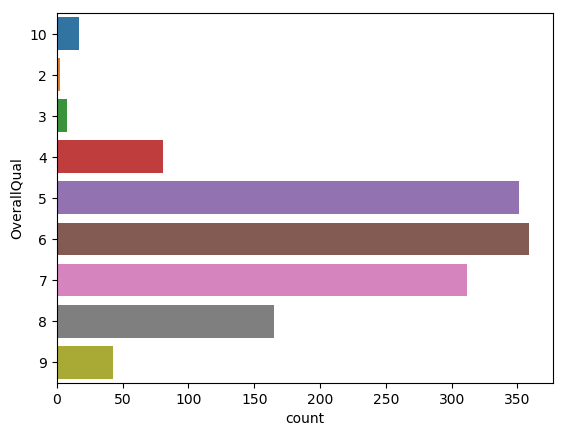

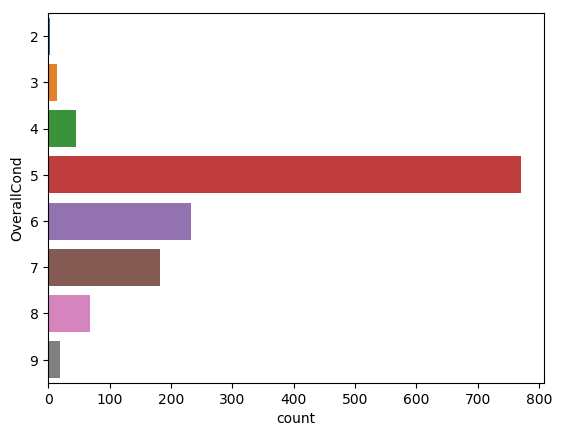

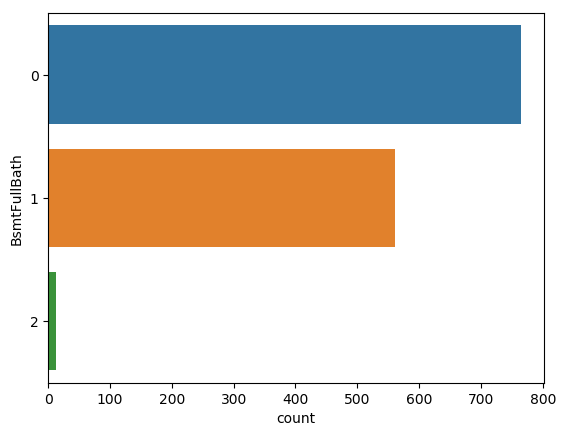

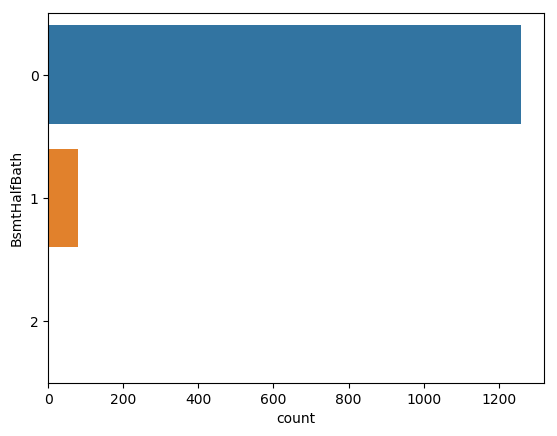

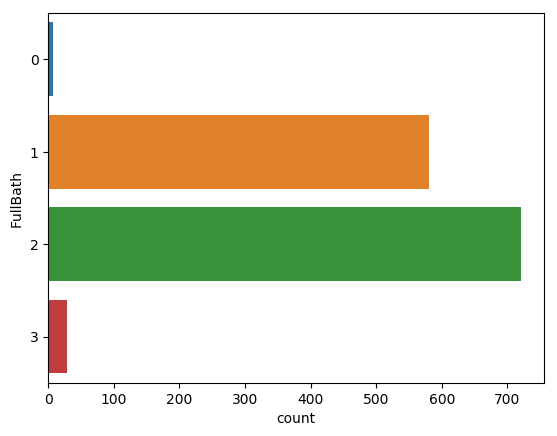

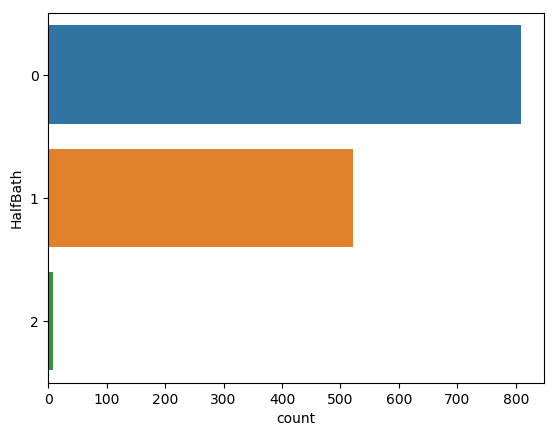

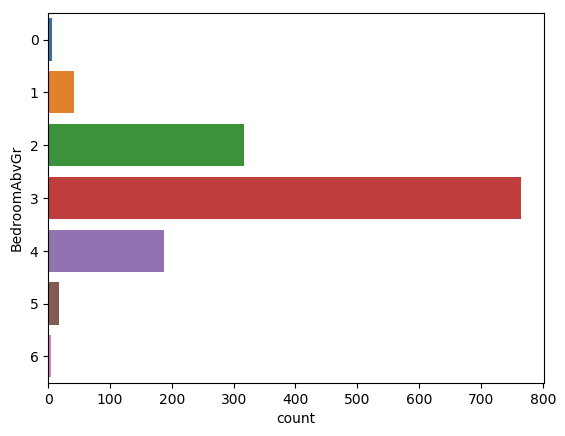

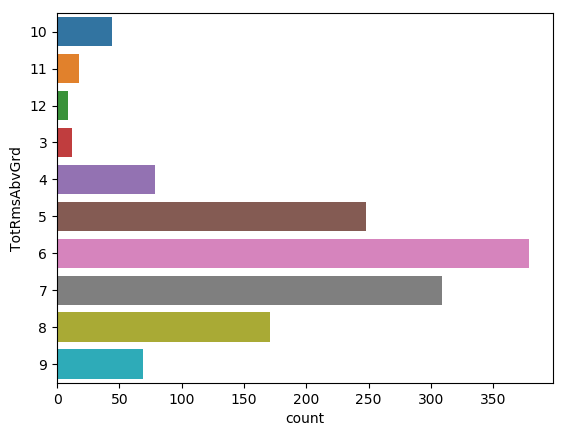

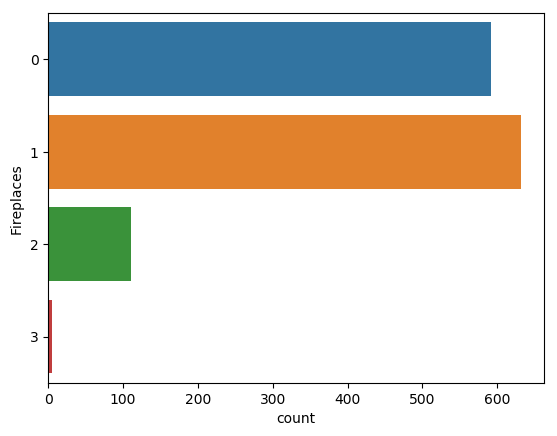

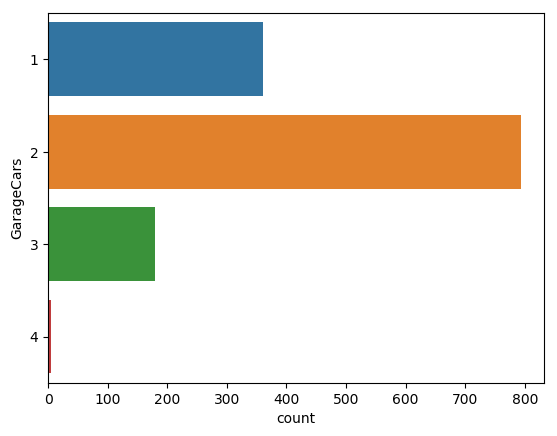

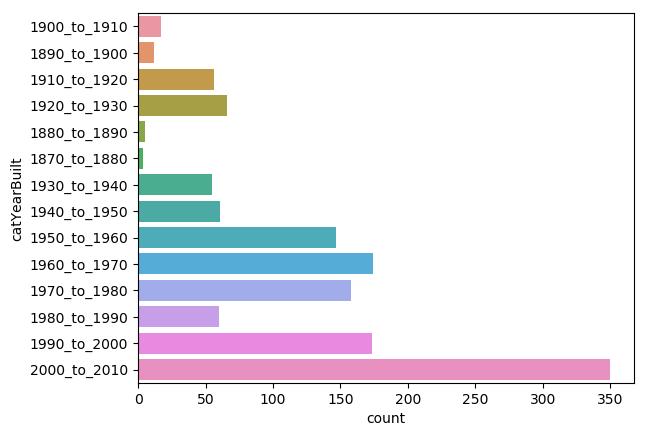

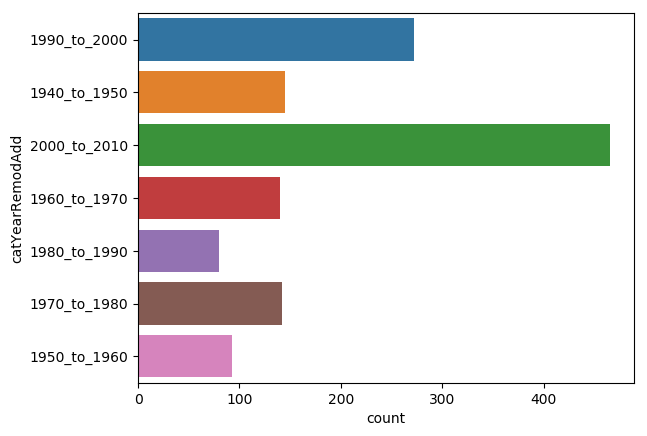

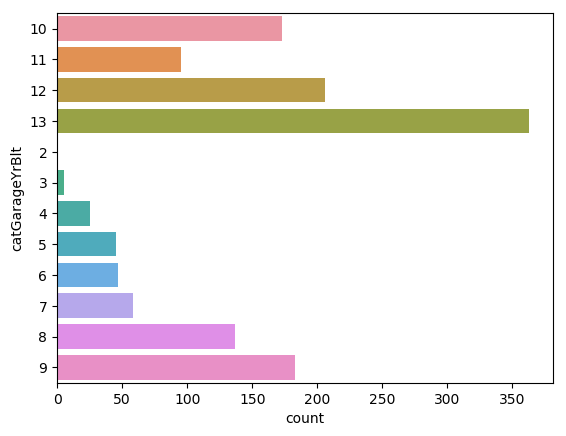

In [1225]:
bar_plotting(categorical_data)

### Performing one hot encoding on the categorical variables

In [1226]:
categorical_data=pd.get_dummies(categorical_data)

In [1227]:
categorical_data2=pd.get_dummies(categorical_data2)

### Visualization of numerical data

In [1228]:
numerical_data=data.drop(data.select_dtypes(include=['object']).columns,axis=1)
numerical_data=numerical_data.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
                         'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                         'GarageCars','YrSold'],axis=1)
focus_variable=numerical_data['SalePrice']
numerical_data=numerical_data.drop(['SalePrice'],axis=1)

In [1229]:
numerical_data2=testing.drop(testing.select_dtypes(include=['object']).columns,axis=1)
numerical_data2=numerical_data2.drop(['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',
                         'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                         'GarageCars','YrSold'],axis=1)
#focus_variable=numerical_data['SalePrice']
#numerical_data=numerical_data.drop(['SalePrice'],axis=1)

In [1230]:
numerical_data2.shape

(1459, 25)

In [1231]:
numerical_data.head()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,94,190,60.0,7200,1910,1998,0.0,1046,0,168,...,1900.0,506,0,0,0,0,99,0,0,11
1,654,50,60.0,10320,1906,1995,0.0,0,0,756,...,1906.0,216,57,0,239,0,0,0,0,6
2,849,50,75.0,45600,1908,1997,0.0,0,0,907,...,1908.0,360,486,40,0,0,175,0,0,9
3,247,190,69.0,9142,1910,1950,0.0,0,0,1020,...,1910.0,440,0,60,112,0,0,0,0,4
4,741,70,60.0,9600,1910,2002,0.0,0,0,264,...,1910.0,360,270,0,112,0,0,0,0,5


### Mixed plots for both categorical and numerical data

#### box plots

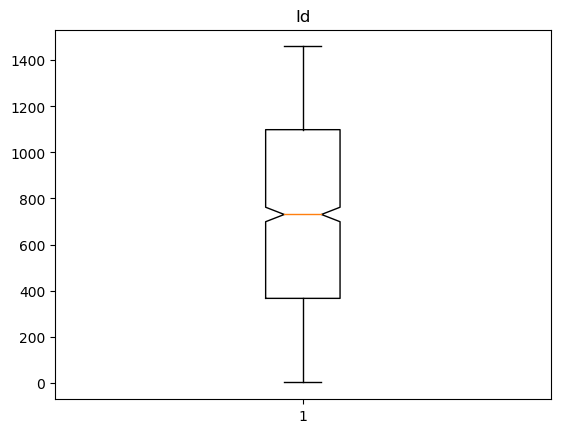

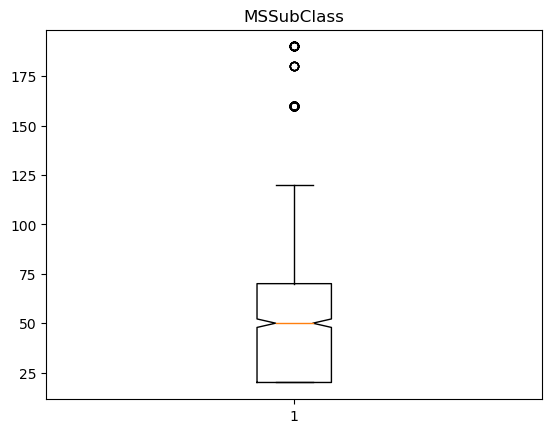

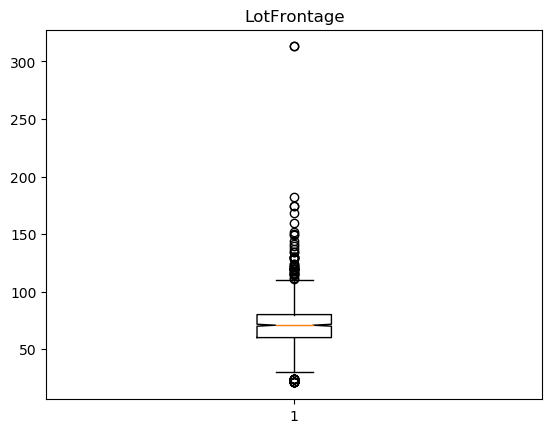

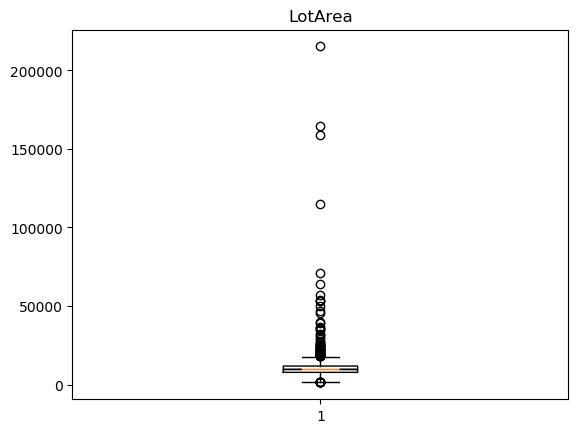

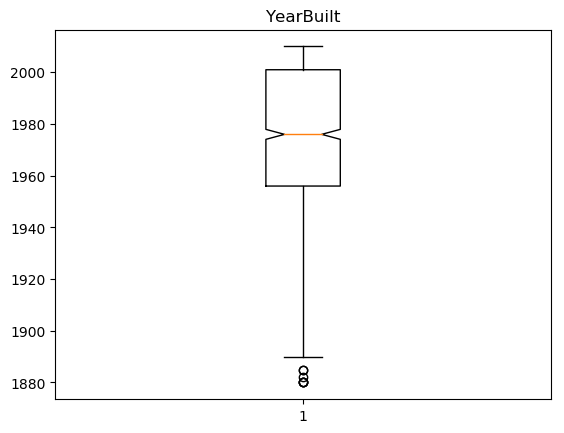

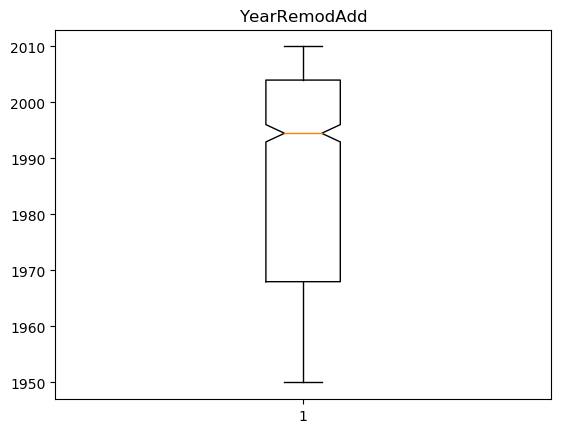

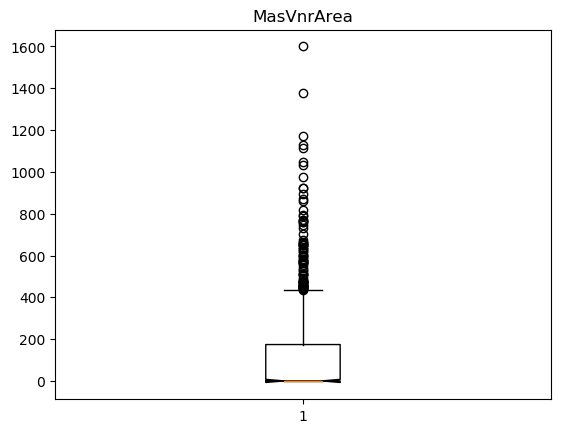

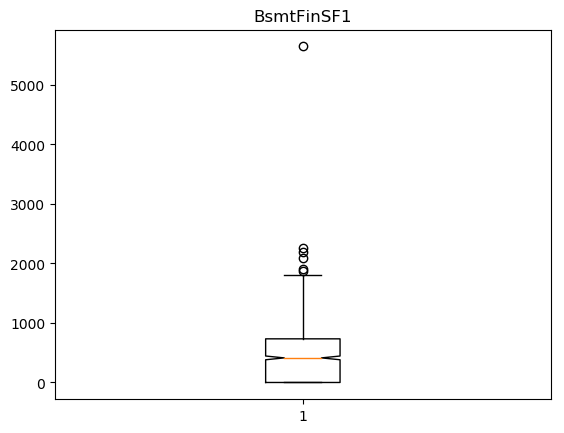

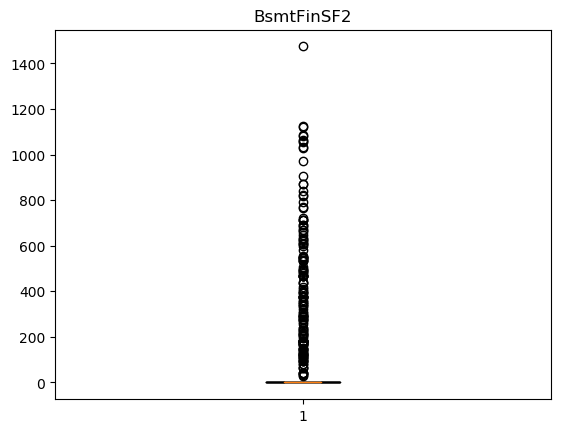

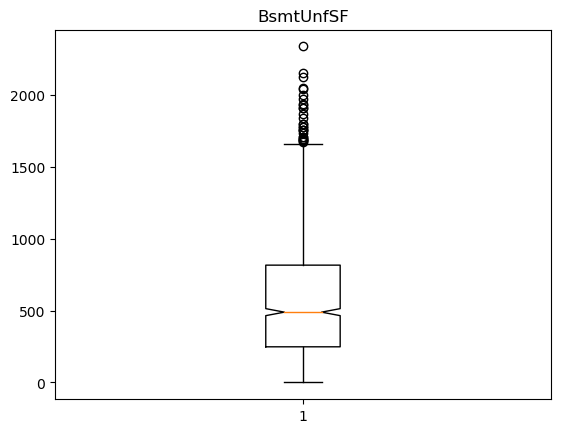

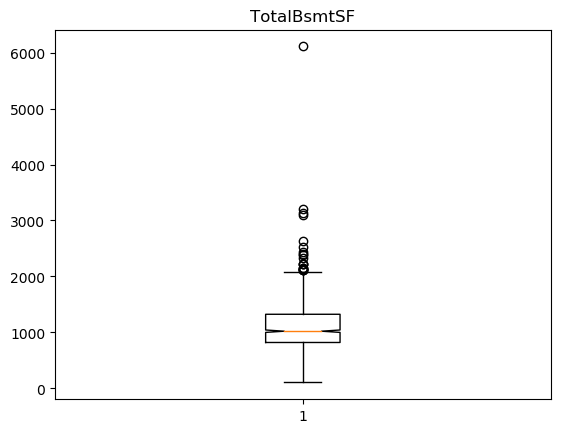

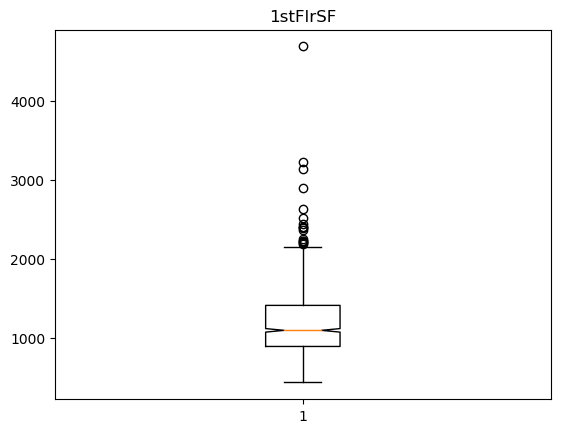

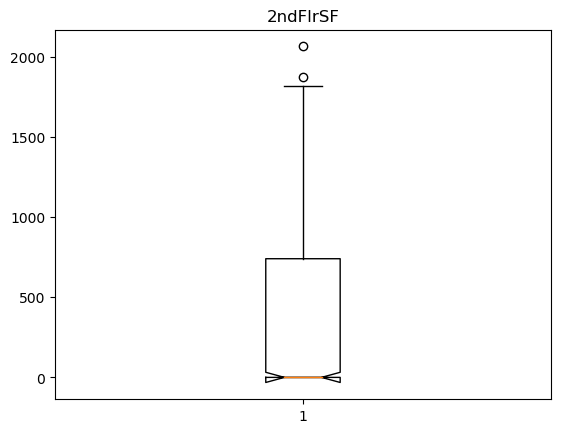

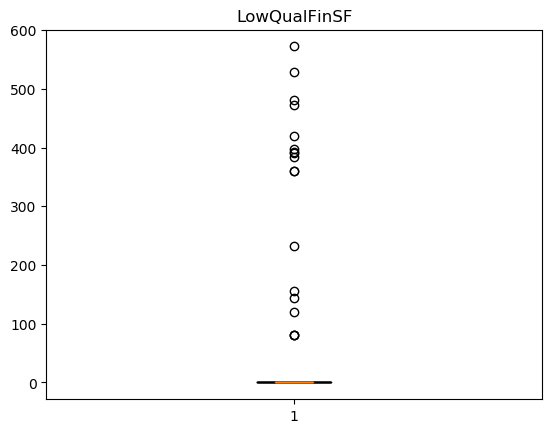

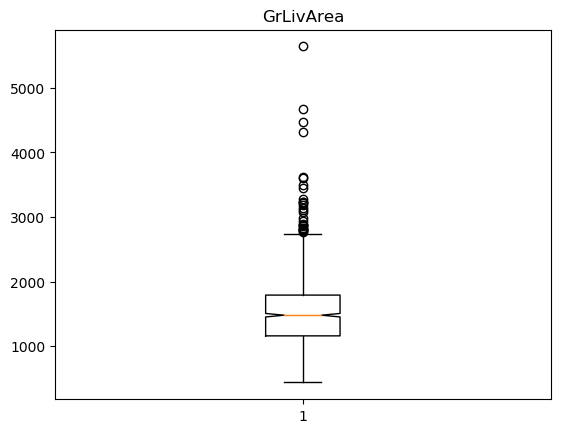

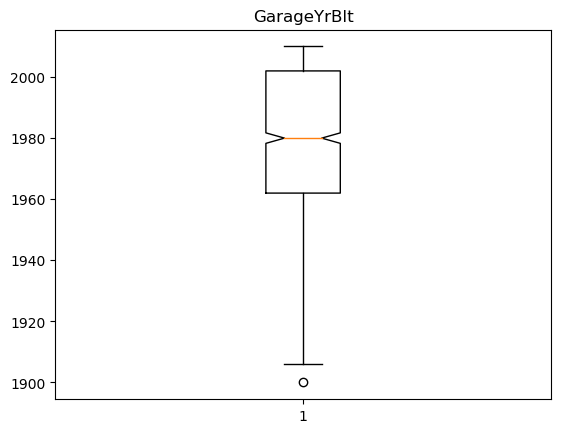

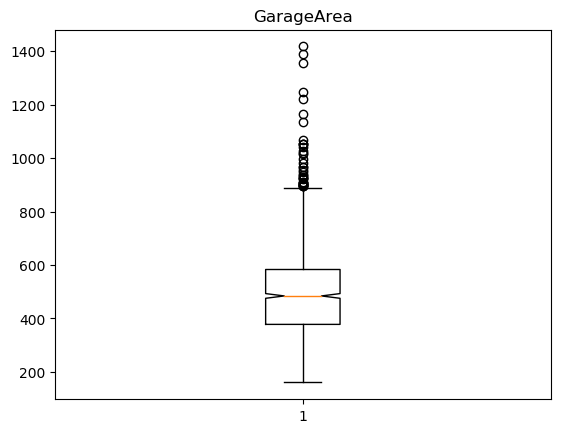

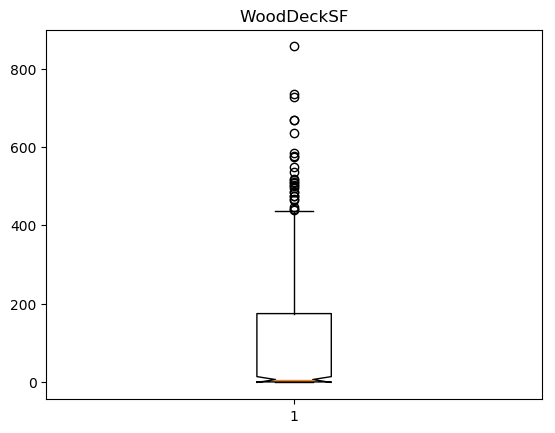

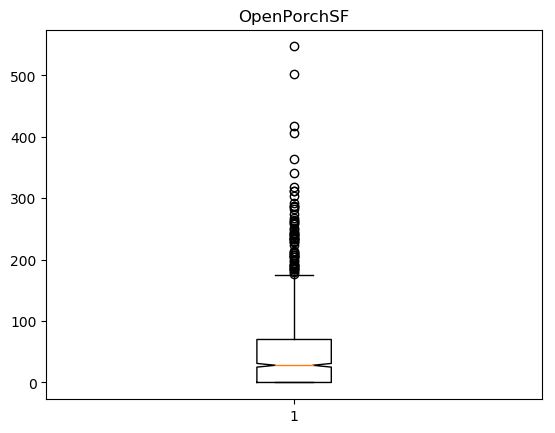

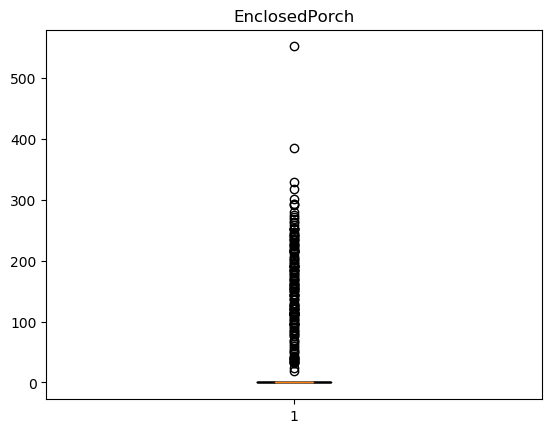

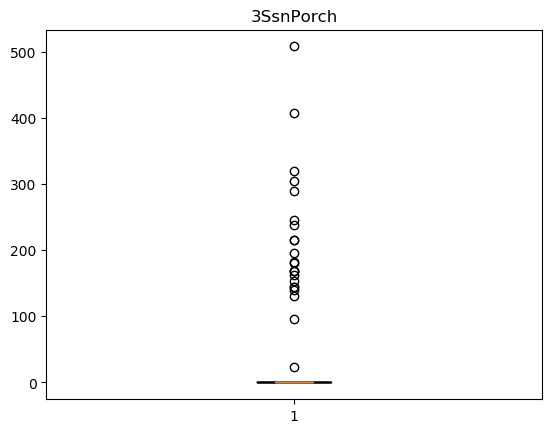

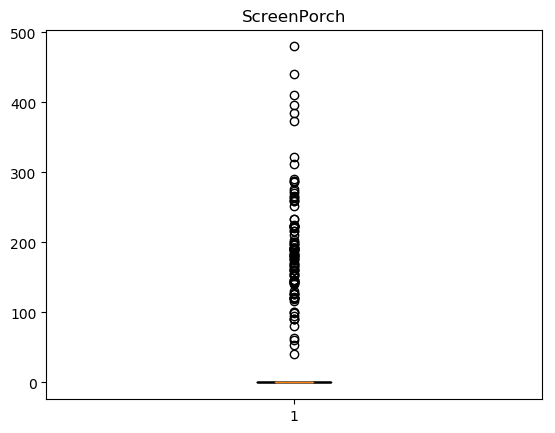

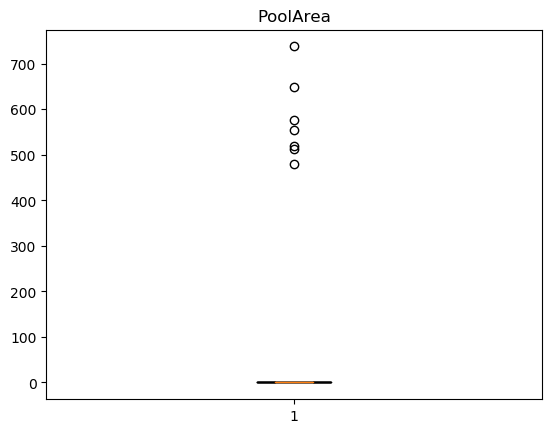

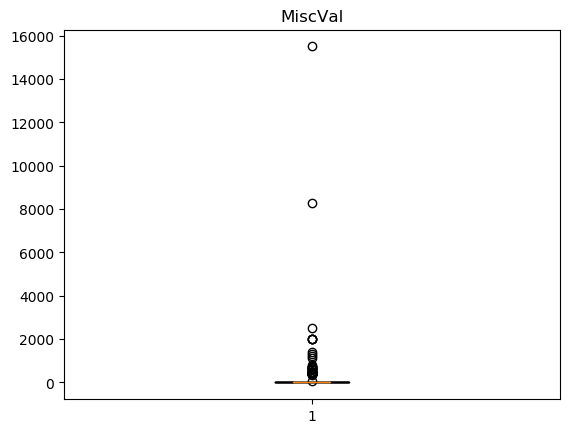

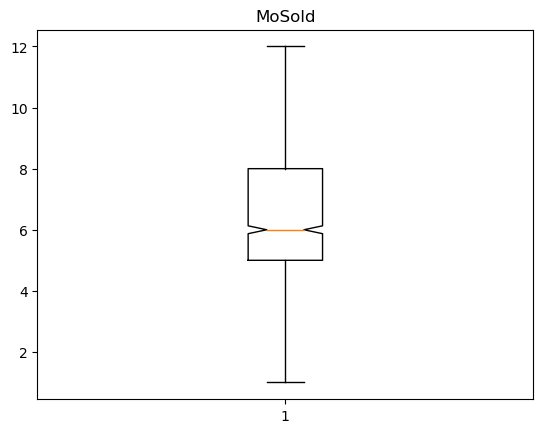

In [1232]:
for i in numerical_data.columns:
    plt.figure()
    plt.boxplot(numerical_data[i], 1)
    plt.title(i)
    plt.show()

### checking correlation of the numerical variables with sale price

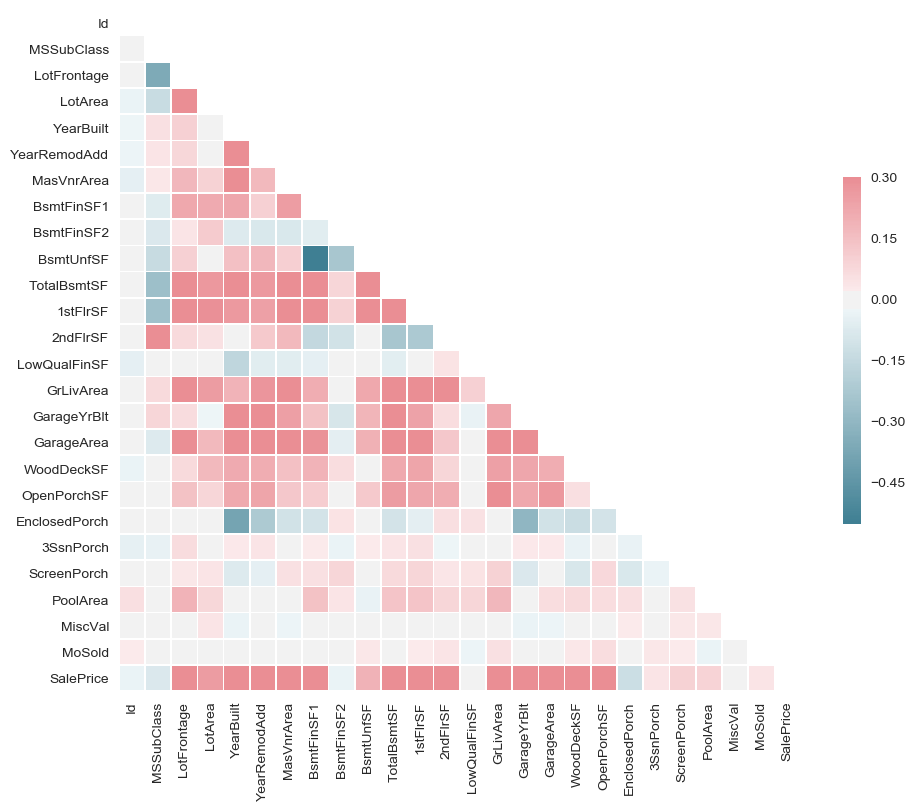

In [1233]:
sns.set(style="white")
corr=numerical_data.join(focus_variable).corr()
# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The result above show that the dependence of the defferent variables is below 0.45. This means that the variable are close to indepence. When we look at the row of sale price. We realize there are some variables which are not correlated at all to it. These variables will bring noise to out model. Therefore we are going to drop these variables.

In [1234]:
numerical_data=numerical_data.drop(['MSSubClass','BsmtFinSF1','LowQualFinSF','MiscVal'],axis=1)

In [1235]:
numerical_data2=numerical_data2.drop(['MSSubClass','BsmtFinSF1','LowQualFinSF','MiscVal'],axis=1)
numerical_data2.shape

(1459, 21)

Basing on my experience. Cleaning of data in data science is the most important step before modeling. Most effort shoild be put in cleaning data to have a good model. The following section we are going to fit a gradient boosting model into our data. We are going to use a package called ensemble found inside the package of scykit learn. To understand the underneath working of gradient boosting, follow this link to my blogs about ensemble methods 

## Gradient boosting machine

In [1236]:
final_data=categorical_data.join(numerical_data).drop(['Id'],axis=1)

In [1237]:
final_data2=categorical_data2.join(numerical_data2).drop(['Id'],axis=1)

In [1238]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [1239]:
offset = int(final_data.shape[0] * 0.8)
X_train, y_train = final_data[:offset], focus_variable[:offset]
X_test, y_test = final_data[offset:], focus_variable[offset:]

In [1240]:
# #############################################################################
# Fitting regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 3621991441.0950


Text(0,0.5,'Deviance')

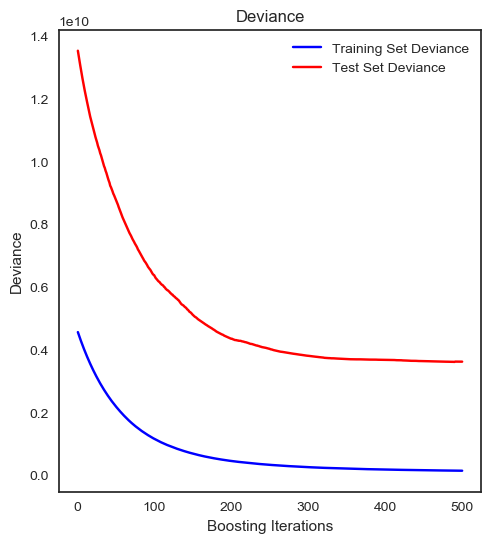

In [1241]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


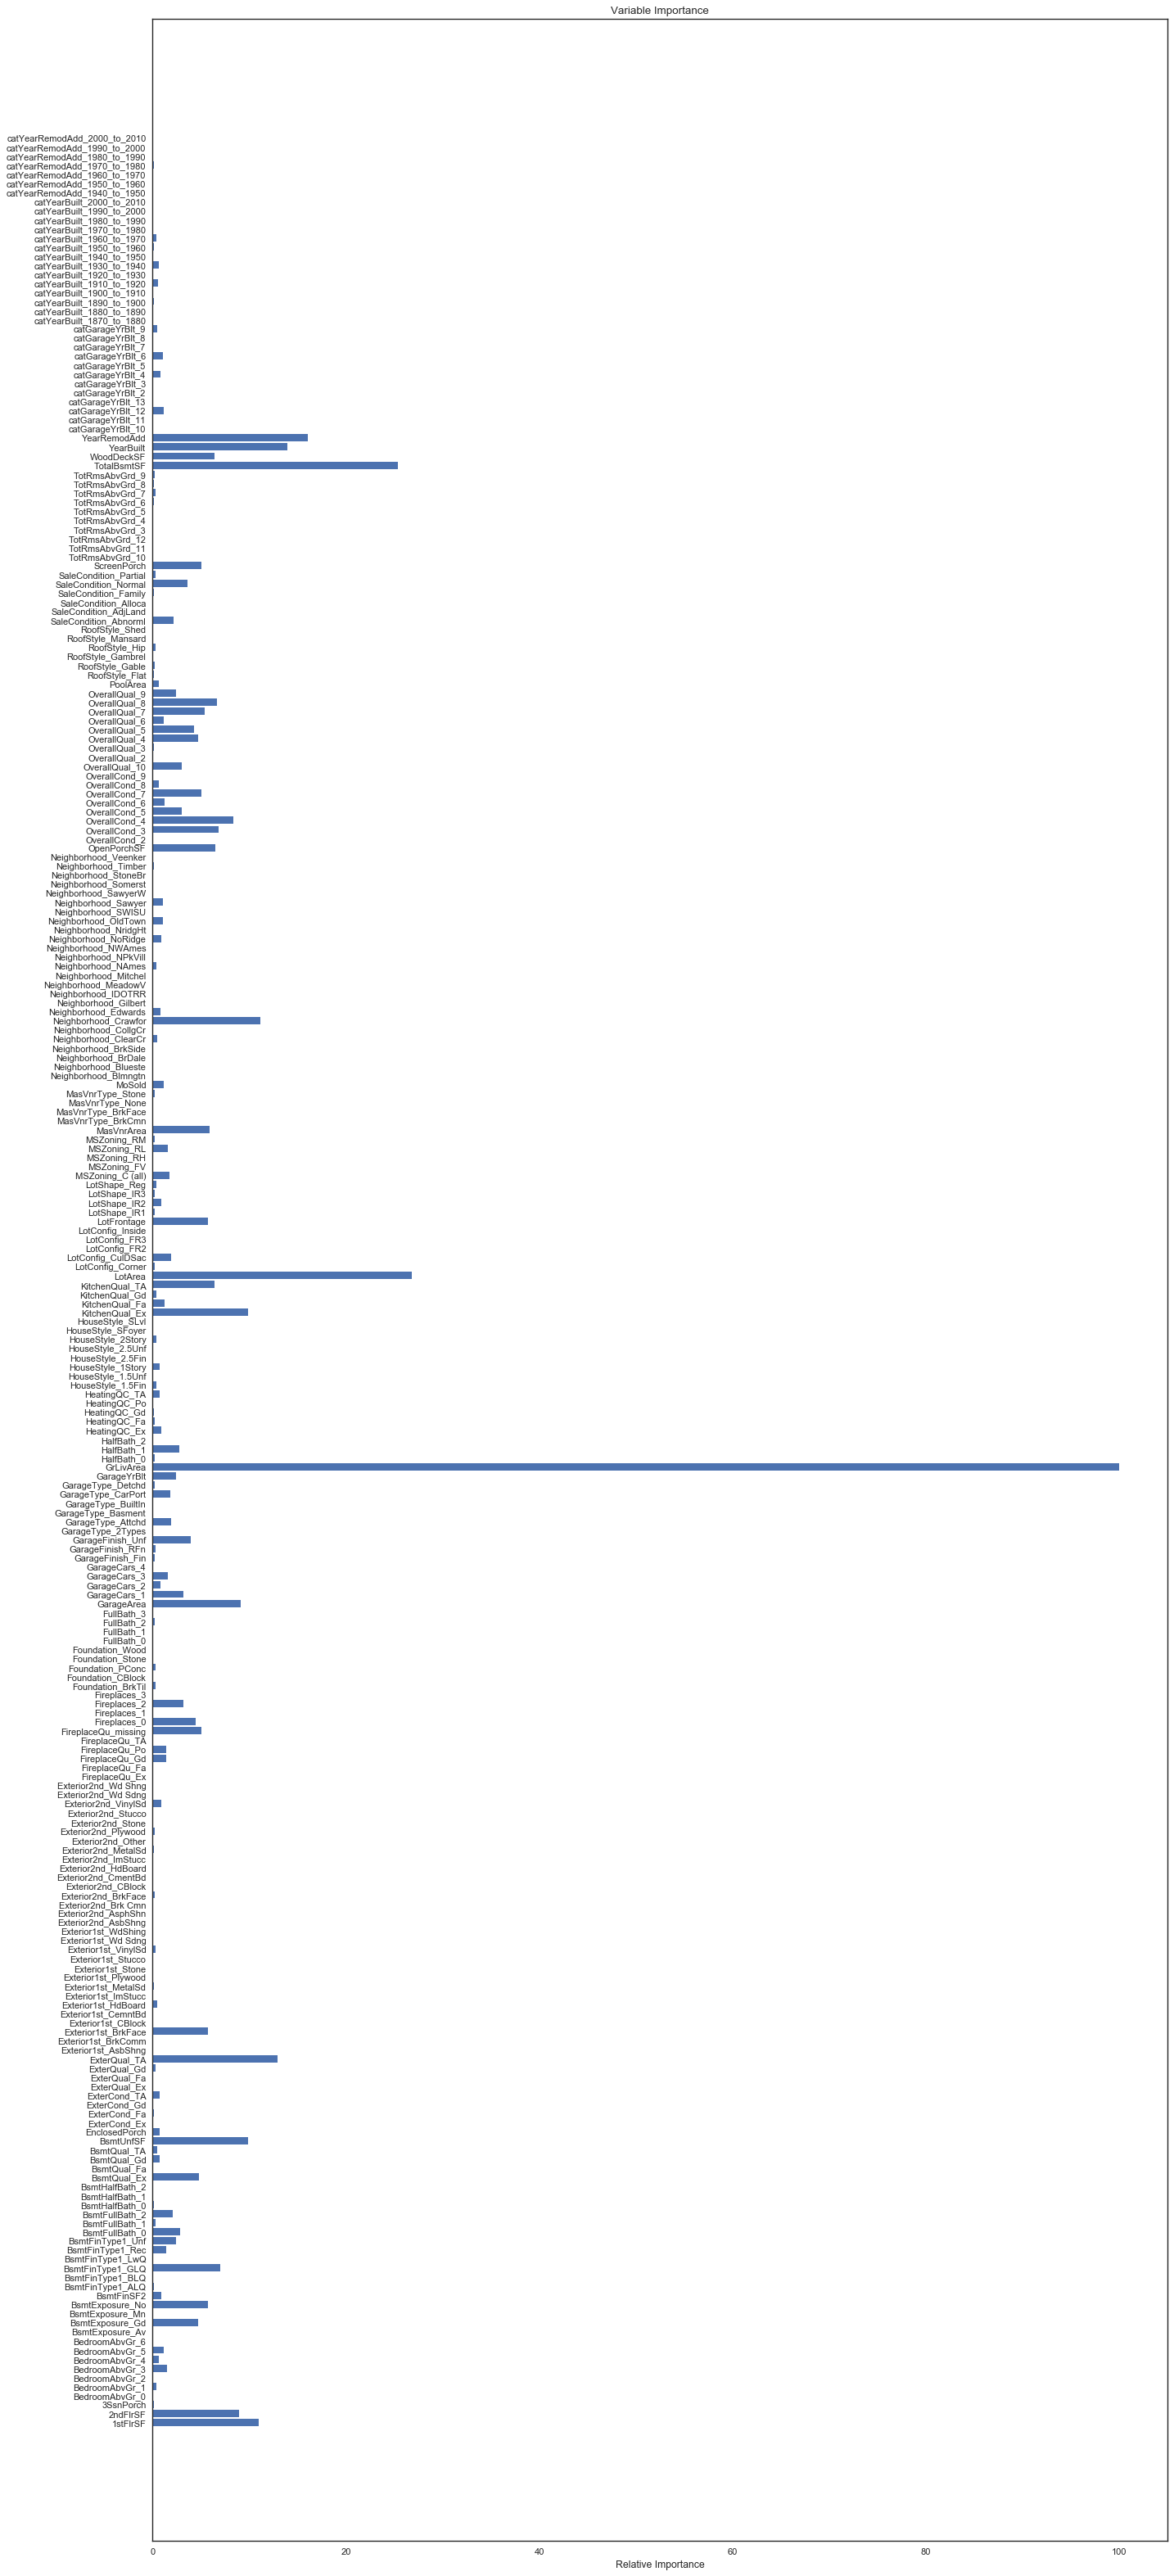

In [1242]:
# #############################################################################
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 50), dpi=80, facecolor='w', edgecolor='k')
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
plt.barh(final_data.columns, feature_importance, align='center')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [1243]:
new_features=[]
for i in range(len(final_data.columns)):
    if feature_importance[i]>=0.7:
        a='{}'.format(final_data.columns[i])
        new_features.append(a)
new_features

['MSZoning_C (all)',
 'MSZoning_RL',
 'LotShape_IR2',
 'LotConfig_CulDSac',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_NoRidge',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Exterior1st_BrkFace',
 'Exterior2nd_VinylSd',
 'ExterQual_TA',
 'ExterCond_TA',
 'BsmtQual_Ex',
 'BsmtQual_Gd',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'HeatingQC_Ex',
 'HeatingQC_TA',
 'KitchenQual_Ex',
 'KitchenQual_Fa',
 'KitchenQual_TA',
 'FireplaceQu_Gd',
 'FireplaceQu_Po',
 'FireplaceQu_missing',
 'GarageType_Attchd',
 'GarageType_CarPort',
 'GarageFinish_Unf',
 'SaleCondition_Abnorml',
 'SaleCondition_Normal',
 'OverallQual_10',
 'OverallQual_4',
 'OverallQual_5',
 'OverallQual_6',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_5',
 'OverallCond_6',
 'OverallCond_7',
 'BsmtFullBath_0',
 'BsmtFullBath_2',
 'HalfBath_1',
 'BedroomAbvGr_3',
 'BedroomAbvGr_5',
 'Fir

In [1245]:
new_final_data=final_data[new_features].drop(['BsmtFullBath_0','BsmtFullBath_2','GarageCars_1','GarageCars_2'
                                              ,'GarageCars_3','catGarageYrBlt_12','catGarageYrBlt_4',
                                              'catGarageYrBlt_6'],axis=1)

In [1247]:
new_final_data2=final_data2[new_final_data.columns]

In [1248]:
offset = int(new_final_data.shape[0] * 0.8)
X_train, y_train = new_final_data[:offset], focus_variable[:offset]
X_test, y_test = new_final_data[offset:], focus_variable[offset:]
# #############################################################################
# Fitting regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 3588044772.7336


Text(0,0.5,'Deviance')

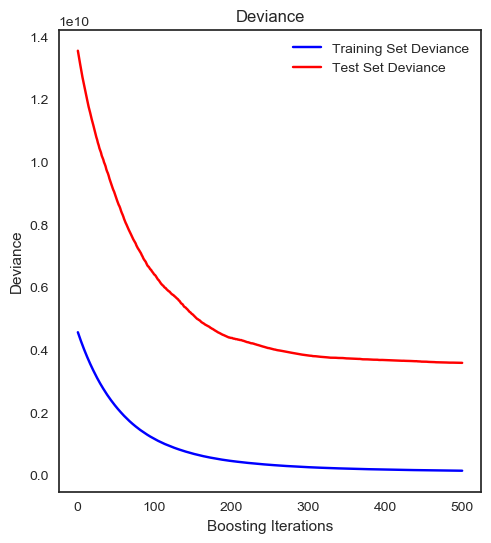

In [1249]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

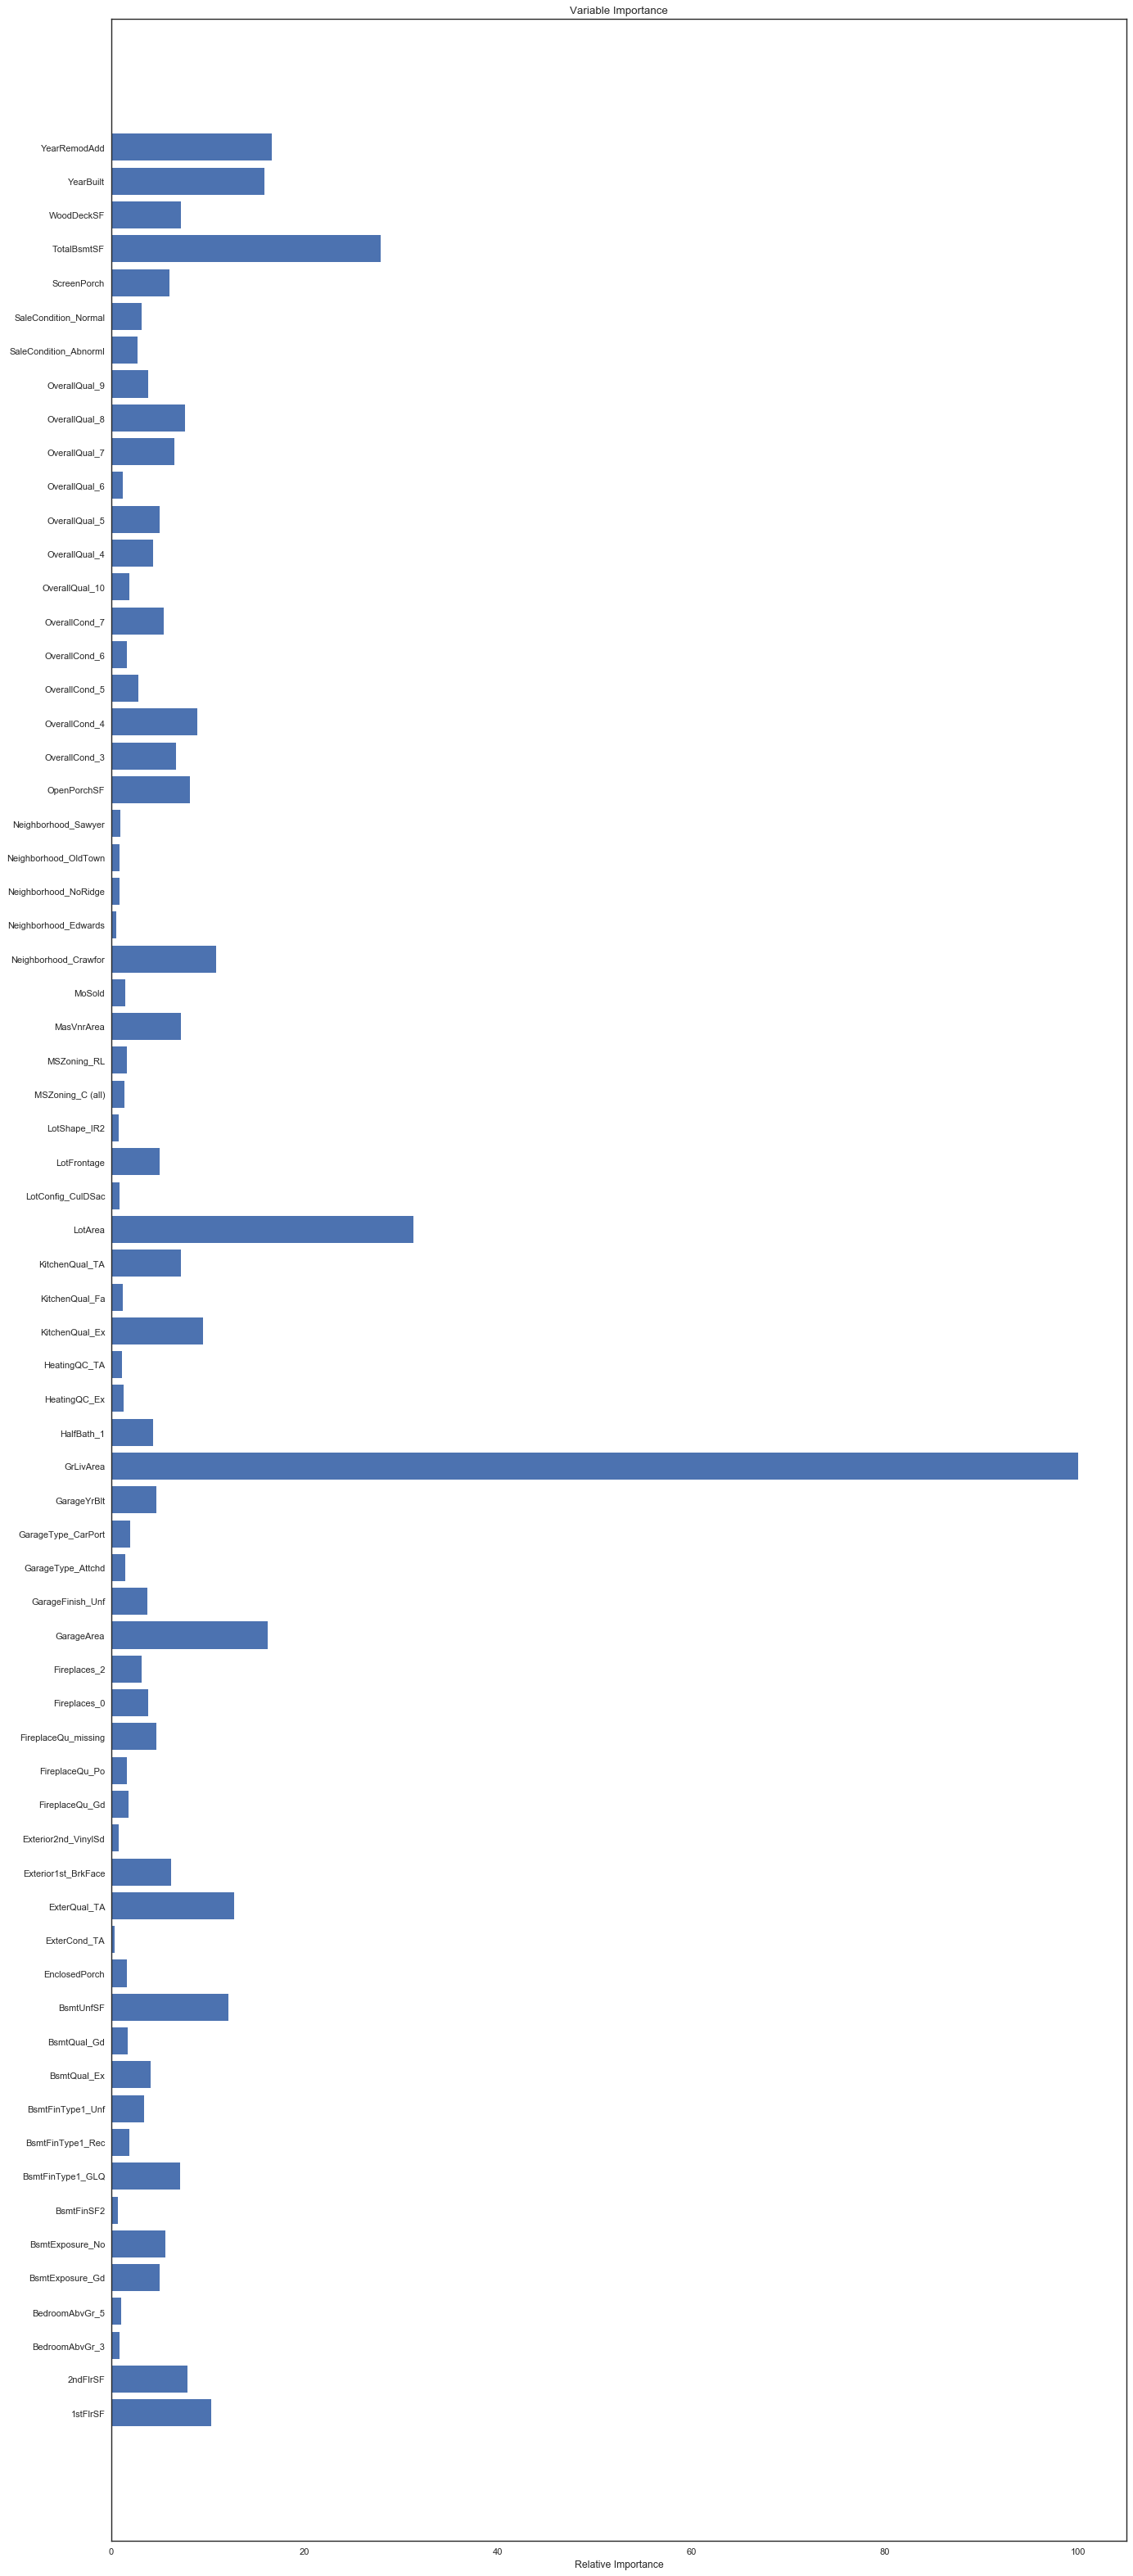

In [1250]:
# #############################################################################
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 50), dpi=80, facecolor='w', edgecolor='k')
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
plt.barh(new_final_data.columns, feature_importance, align='center')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [1251]:
clf.fit(new_final_data, focus_variable)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1252]:
predictions=clf.predict(new_final_data2)

In [1253]:
pred=pd.DataFrame(predictions)
pred.columns=['pred']

In [1254]:
predict=new_final_data2.join(pred).join(categorical_data2.join(numerical_data2)['Id'])

In [1255]:
predict.columns

Index(['MSZoning_C (all)', 'MSZoning_RL', 'LotShape_IR2', 'LotConfig_CulDSac',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Exterior1st_BrkFace',
       'Exterior2nd_VinylSd', 'ExterQual_TA', 'ExterCond_TA', 'BsmtQual_Ex',
       'BsmtQual_Gd', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_TA',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_TA', 'FireplaceQu_Gd',
       'FireplaceQu_Po', 'FireplaceQu_missing', 'GarageType_Attchd',
       'GarageType_CarPort', 'GarageFinish_Unf', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'OverallQual_10', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'HalfBath_1', 'BedroomAbvGr_3',
       'BedroomAbv

In [1256]:
predict[[ 'Id','pred']].to_csv("my_predictions.csv", sep=',')

In [1257]:
predict

,MSZoning_C (all),MSZoning_RL,LotShape_IR2,LotConfig_CulDSac,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_OldTown,Neighborhood_Sawyer,Exterior1st_BrkFace,...,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,pred,Id
0,0,0,0,0,0,0,0,0,0,0,...,896,1961.0,730.0,140,0,0,120,6,126472.733201,1461
1,0,1,0,0,0,0,0,0,0,0,...,1329,1958.0,312.0,393,36,0,0,6,156235.252852,1462
2,0,1,0,0,0,0,0,0,0,0,...,1629,1997.0,482.0,212,34,0,0,3,189386.515176,1463
3,0,1,0,0,0,0,0,0,0,0,...,1604,1998.0,470.0,360,36,0,0,6,191187.207524,1464
4,0,1,0,0,0,0,0,0,0,0,...,1280,1992.0,506.0,0,82,0,144,1,185028.131704,1465
5,0,1,0,0,0,0,0,0,0,0,...,1655,1993.0,440.0,157,84,0,0,4,177966.547054,1466
6,0,1,0,0,0,0,0,0,0,0,...,1187,1992.0,420.0,483,21,0,0,3,163871.150683,1467
7,0,1,0,0,0,0,0,0,0,0,...,1465,1998.0,393.0,0,75,0,0,5,167348.343125,1468
8,0,1,0,0,0,0,0,0,0,0,...,1341,1990.0,506.0,192,0,0,0,2,183444.361080,1469
9,0,1,0,0,0,0,0,0,0,0,...,882,1970.0,525.0,240,0,0,0,4,125687.795241,1470
